# Online Retail - Costumer Segmentation


---

Cohort Analysis - RFM Segmentation - KMeans Clustering

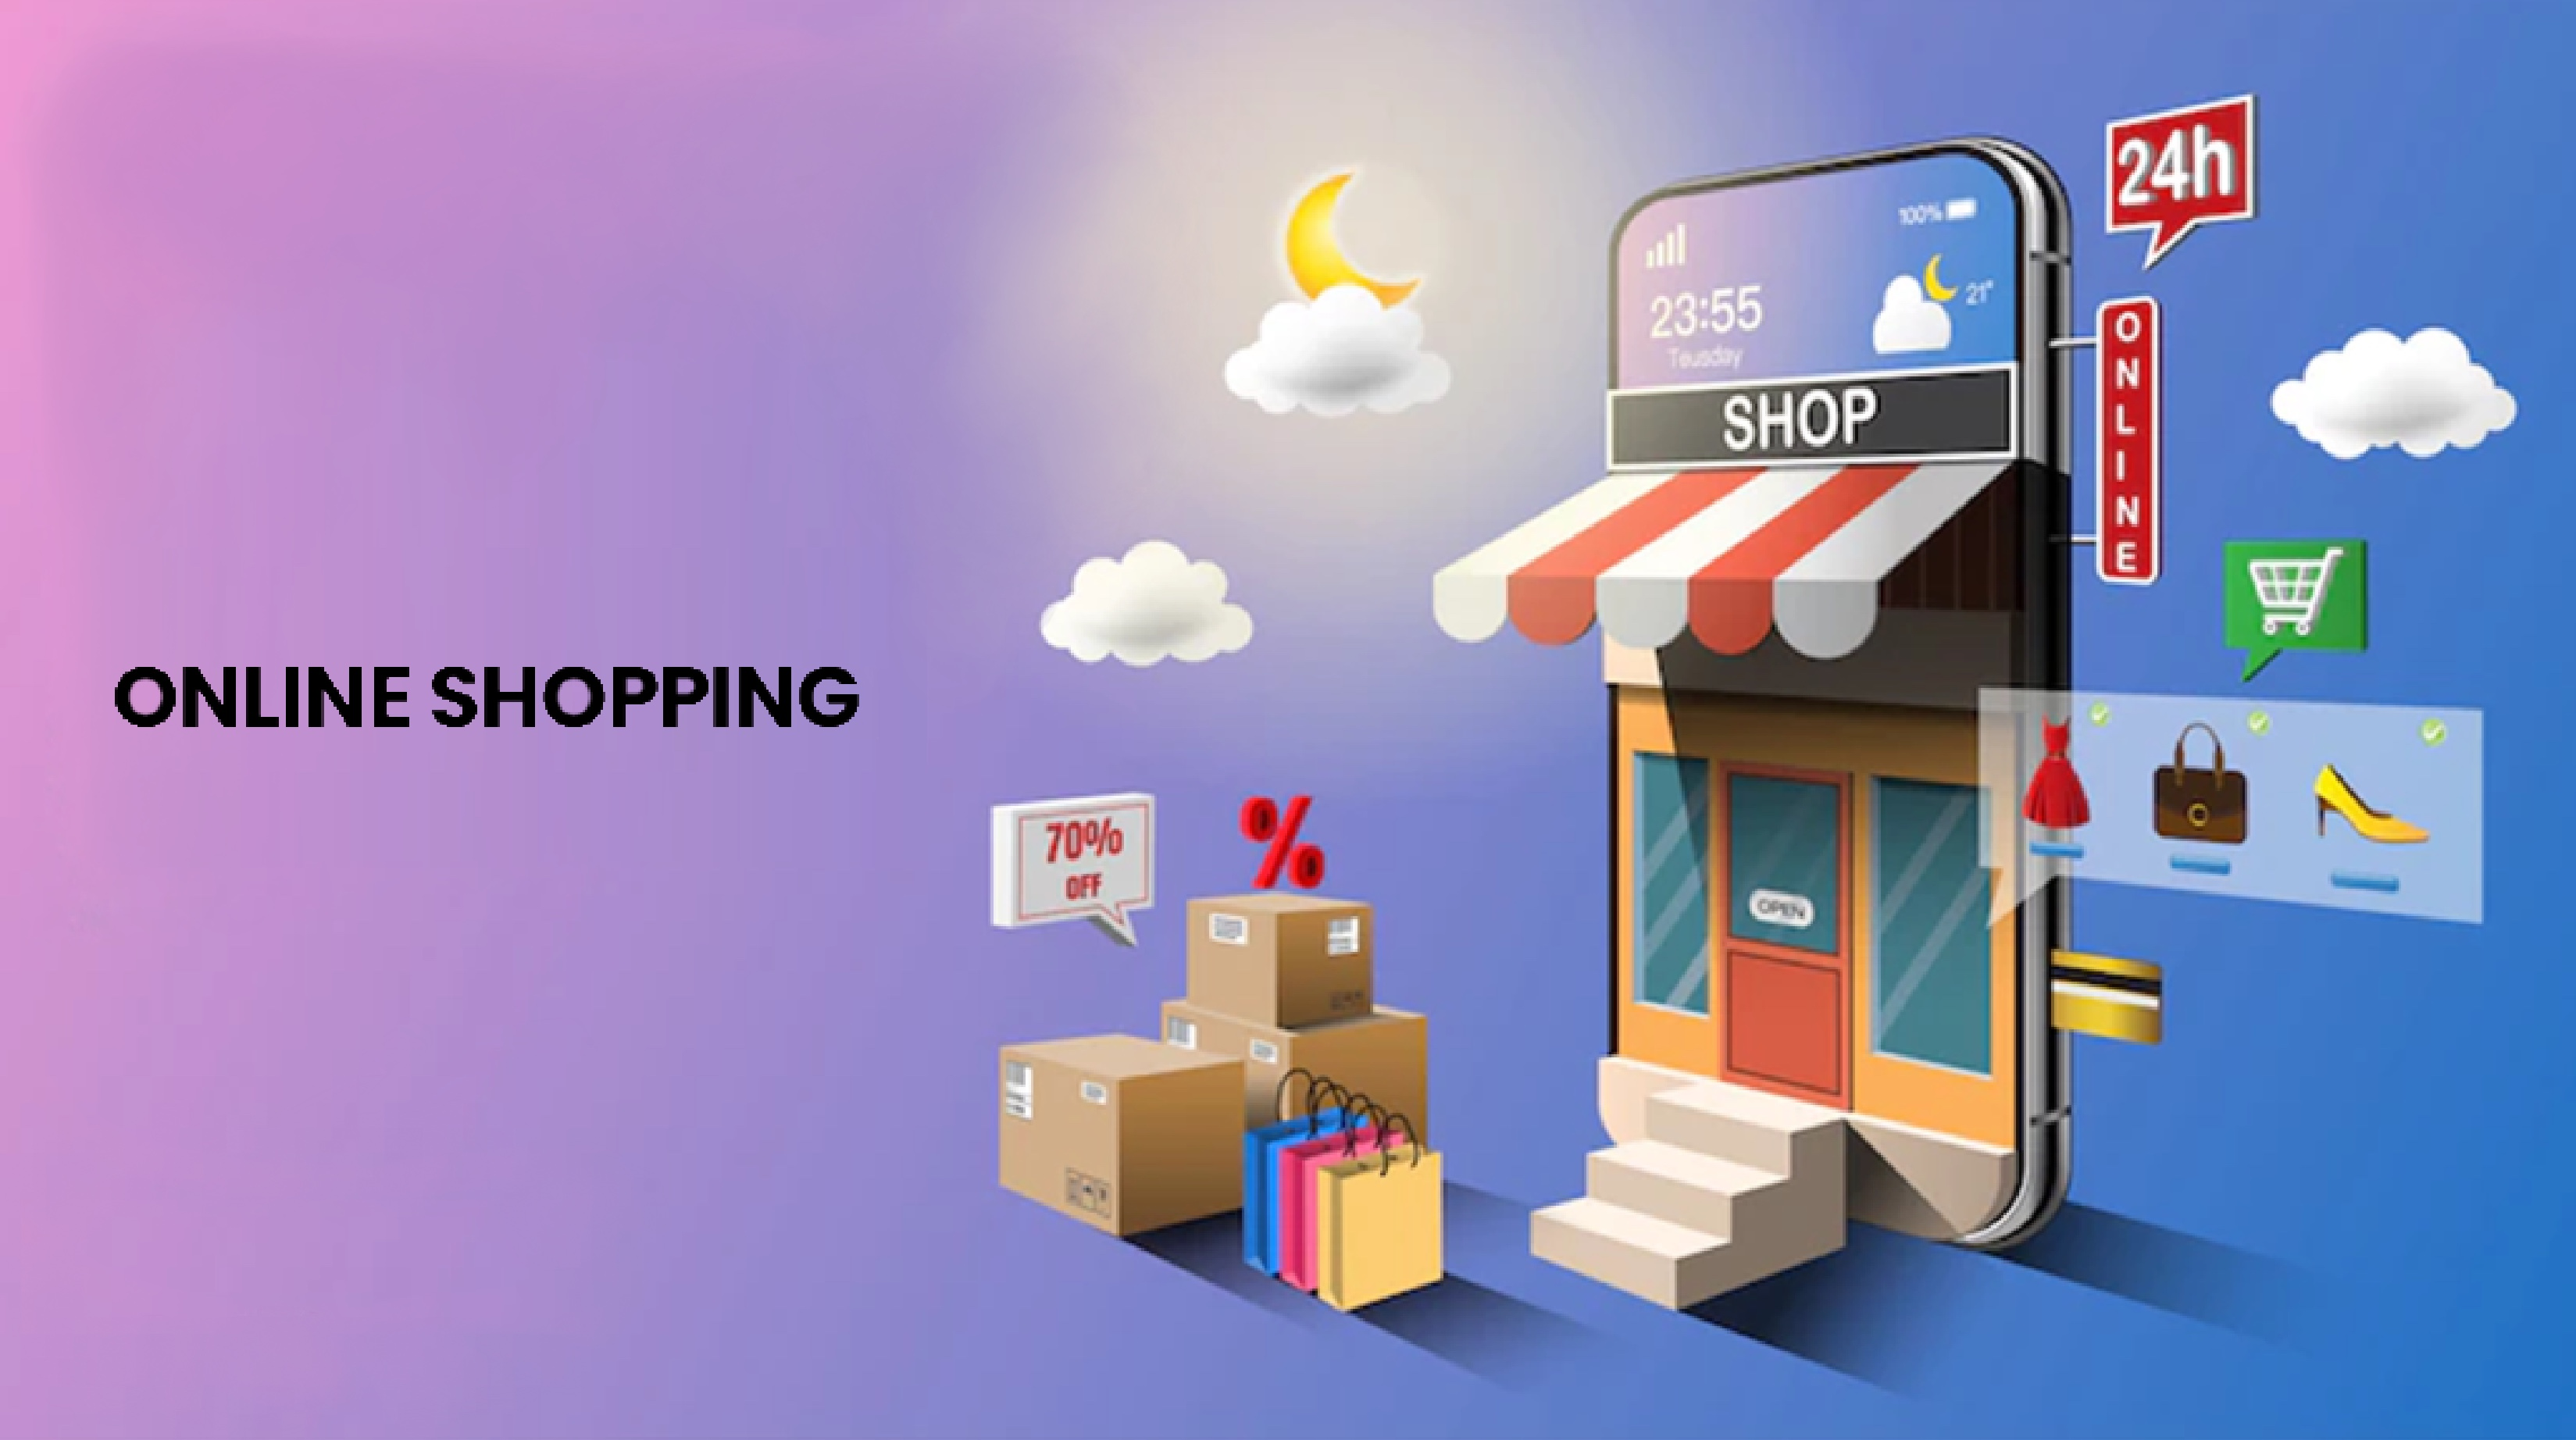

##Table of contents


1. [Introdution](#introduction)
2. [Executive Summary](#executive-summary)
3. [Data](#data)
4. [Exploratory Data Analysis](#eda)  
5. [Cohort Analysis](#cohort-analysis)
6. [RFM Segmentation](#rfm-segmentation)
7. [K-Means Clustering](#k-means-clustering)
8. [Conclusion](#conclusion)


 

<a name="Introduction"></a>
##1. Introduction

In today's digital age, online retail has become an integral part of the global consumer landscape. With the exponential growth of e-commerce platforms and the convenience they offer, customers now have access to a vast array of products and services at their fingertips. The success of online retailers heavily relies on their ability to understand and cater to the diverse needs and preferences of their customer base. This is where customer segmentation comes into play.

Customer segmentation is the process of dividing a broad customer base into distinct groups or segments based on shared characteristics, behaviors, and preferences. By understanding the unique needs of each segment, businesses can tailor their marketing strategies, product offerings, and customer experiences to enhance customer satisfaction and drive profitability.

<a name="executive-summary"></a>
##2. Executive Summary

The objective of this study is to conduct a comprehensive customer segmentation analysis for an online retail company to gain deep insights into its customer base and identify meaningful segments. Through this analysis, we seek to uncover key customer profiles, their characteristics, motivations, and preferences. This will enable the company to devise targeted marketing strategies, optimize product offerings, and enhance customer experiences, thereby maximizing customer satisfaction and loyalty. To accomplish these goals, we need to solve several tasks.

**Tasks**
1.  Find the top 5 Countries where retail sells most products?
2.  How many products are sold in the top 5 countries?
3.  What is the revenue for the top 5 countries?
4.  What are the top 10 best-seller products?
5.  What is the best-seller product for the top 5 countries?
6.  What is the company's orders trend during the year?
7.  What is the company's revenue trend during the year?
8.  What is the day of the week when the most orders were placed?
9.  What is the time when most orders were placed?
10. What is the customer retention rate?
11. What are the customer Recency, Frequency, and Monetary Values metrics?
12. Implement a Machine Learning model to identify proper segmentation.

**Results**
1.  The top 5 countries by product sold are:
 1. United Kingdom leads with 85.6% of the market share. 
 2.  Germany
 3.  France
 4.  EIRE
 5.  Spain
2.  The number of products sold by the top 5 countries are:
 - United Kingdom approximately 2 million units.
 -  Germany with 79K units.
 -  France with 71K units. 
 -  EIRE 56K units.
 -  Spain 18K units.
3.  The revenues for the top 5 countries are:
 -  United Kingdom = 3.431.183,30 £
 -  Germany = 130.006,11 £
 -  France = 115.191,15 £
 -  EIRE = 100.522,81 £
 -  Spain = 29.175,55 £
4.  The top 10 best-sellers are:
 1.  PACK OF 72 RETROSPOT CAKE CASES 
 2.  ASSORTED COLOUR BIRD ORNAMENT 
 3.  JUMBO BAG RED RETROSPOT 
 4.  WHITE HANGING HEART T-LIGHT HOLDER 
 5.  LUNCH BAG RED RETROSPOT 
 6.  PACK OF 60 PINK PAISLEY CAKE CASES 
 7.  60 TEATIME FAIRY CAKE CASES 
 8.  JAM MAKING SET PRINTED 
 9.  RED RETROSPOT WRAP 
 10. SET OF 4 PANTRY JELLY MOULDS 
5.  The best seller product for each top 5 countries is:
 - ASSORTED COLOUR BIRD ORNAMENT for the United Kingdom, which is the 2nd company best seller.
 - ROUND SNACK BOXES SET OF4 WOODLAND for German.
 - PLASTERS IN TIN CIRCUS PARADE for France.
 - PACK OF 72 RETROSPOT CAKE CASES is the best seller for both EIRE and Spain, which is also the company's best seller.
6.  Generally, the company's orders during the year follow a positive trend until November, which also is the month in which the maximum number of orders is reached (more than 60K), then the trend shows a rapid decline. (Figure: )
7.  The revenue trend follows the orders trend. (Figure: )
8.  The day of the week where the most orders were recorded is Thursdays, while Fridays record fewer.
9.  Most orders are placed between 12:00 and 2:00 p.m., which means customers tend to purchase during their lunch break. There are no orders recorded between 20:00 and 6:00.
10. The cohort analysis has shown that the retention rates of the customers vary depending on their cohort. For example, the January 2011 cohort maintained a consistently high retention rate throughout the year, whereas the June 2011 cohort started slowly but eventually achieved a higher retention rate in the later months. It is worth noting that after the initial month of enrollment, roughly 20% of consumers continue to use the platform actively.
11. Online Retail customers have been segmented into five groups using RFM analysis, based on their Recency, Frequency, and Monetary Value scores. The highest average values for all three variables were observed in the 5-stars segment, indicating that these customers are the most valuable. Conversely, the 1-star segment had the lowest average values for all three variables, implying that these customers are the least valuable.
12. The K-Means Clustering model implemented produced more insights about customer behavior with the segmentation of 4 clusters. The snake plots depict the distinct separation between clusters indicating a diverse and well-balanced mix, and the heatmaps of the relative importance of attributes demonstrate that Frequency and Monetary Values metrics have a strong influence on segmentation.



<a name="data"></a>
##3. Data

In the following analysis, I am going to use the Online Retail Data Set, which was obtained from the UCI Machine Learning repository ([source](https://archive.ics.uci.edu/ml/datasets/online+retail)). This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

|Column name|Description|
|---|---|
|InvoiceNo| Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.| 
|StockCode| Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.| 
|Description| Product (item) name. Nominal.| 
|Quantity| The quantities of each product (item) per transaction. Numeric.| 
|InvoiceDate| Invice Date and time. Numeric, the day and time when each transaction was generated.| 
|UnitPrice| Unit price. Numeric, Product price per unit in sterling.|
|CustomerID| Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.|
|Country| Country name. Nominal, the name of the country where each customer resides.|

<a name='eda'></a>
##4. EDA

In [527]:
#Basic Import
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score


In [528]:
Online = pd.read_excel('/content/Online Retail.xlsx')
Online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [529]:
Online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Dataframe conatains 541909 entries and 8 colums. All coulms have the correct data-type. 

In [530]:
Online.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are in total 136534 missing values of which 1454 and 135080 in cloumns 'Description' and 'CustomerID' respectively.


In [531]:
Online.describe(datetime_is_numeric=True).round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.00,541909,541909.00,406829.00
mean,9.55,2011-07-04 13:34:57.156386048,4.61,15287.69
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


[testo del link](https:// [testo del link](https://))*   We can notice that there are some negative valuese in the columns 'Quantity' and 'UnitPrice' that need to be analyzed. 
*   The fisrt order was made in 2010-12-01
*   The last order in 2011-12-09
*   The time span of the data collected are more than one year.




In [532]:
Online.describe(include='O')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


By looking at the **unique** row we see that:
*   'StockCode' indacates that there are 4070 differnt products.
*   'InvoiceNo' indacates that 25900 transaction was made.
*   'Country' indicates that the retail sell over 38 differnt counties.


In [533]:
len(Online.CustomerID.value_counts())

4372

The retail has 4372 different clients.

### Data Cleaning

In [534]:
# Disable warnings SettingWithCopyWarning
pd.options.mode.chained_assignment = None

In [535]:
df = Online.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

For the purpos of our analysis, since the majority of the Null values was in the CustomerID coulms, we will remove them.

In [536]:
df.duplicated().sum()

5225

In [537]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

There are 5225 duplicated invoices. We will remove duplicates keeping only one of them.

Let's inspet if the dataframe contains canceled invoices. If it is we will remove them and their positive counterparts.

In [538]:
tot_canceled_invoices = df.InvoiceNo.str.startswith('C').sum()
print(f"There are {tot_canceled_invoices} canceled invoices")

There are 8872 canceled invoices


In [539]:
# Defining a boolean mask for the function
canceled_invoices = df.loc[df.InvoiceNo.str.startswith('C') == True]

# Defining the function to get positive counterparts of invoices.
def get_pos_counters(canceled, df):
    """
    Returns a list of indexes of the
    positive counterparts of the canceled invoices.
    """
    pos_counters = []
    # Creating a tuple dictionary (CustomerID, StockCode, -Quantity) from the cancelled DataFrame
    neg_dict = {(row['CustomerID'], row['StockCode'], -row['Quantity']): idx for idx, row in canceled.iterrows()}
    # Iterating on the DataFrame df and, for each row, check whether the corresponding tuple is present in the dictionary
    for idx, row in df.iterrows():
        key = (row['CustomerID'], row['StockCode'], row['Quantity'])
        if key in neg_dict:
            pos_counters.append(neg_dict[key])
    return pos_counters

pos_counters = get_pos_counters(canceled_invoices, df)
indexes_to_drop = canceled_invoices.index.to_list() + pos_counters

lb_remotion = len(df)
df.drop(index=indexes_to_drop, inplace=True)
la_remotion = len(df)

share_removed_inovoices = (lb_remotion - la_remotion) / lb_remotion * 100
print(f"Share of removed invoices {share_removed_inovoices:.1f}%")

Share of removed invoices 2.2%


In [540]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
print(f"Check canceled invoices after removal: {df.InvoiceNo.str.startswith('C').sum()}")

Check canceled invoices after removal: 0


Let's inspect for negative values.

In [541]:
num_cols = df.select_dtypes(include=['float', 'int'])

# Iterating over the numveric columns to check for negative values
for col in num_cols.columns:
    if (num_cols[col] < 0).any():
        neg_count = (num_cols[col] < 0).sum()
        print(f"{col} has {neg_count} negative values")
    else:
        print(f"{col} has no negative values")

Quantity has no negative values
UnitPrice has no negative values
CustomerID has no negative values


All numeric coulumns have not negative values

Let's check again the basic statistcs 

In [542]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


The minum unit price is 0 and this doesn't make sense, so we will remove it from our analysis.

In [543]:
# Filtering df for values equal and over the cents 
df = df[df.UnitPrice >= 0.01]

In [544]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392688.000000,392688.000000,392688.000000
mean,13.119825,3.125946,15287.848903
std,180.493747,22.241947,1713.543619
min,1.000000,0.040000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


After cleaning the data frame we can say that:
*   The average quantity sold id 13, the minmum is 1 and the maxmum 80995
*   The average unit price is 3.12, the minmum is 0,04 and the maxmum 8142,75
*   The data frame has high variance confirmed by the difference between the means and the max values, as well as by the standard deviatons, probabily due to the presence of outliers.

Below the box-plot shows the distributions of the numeric values.

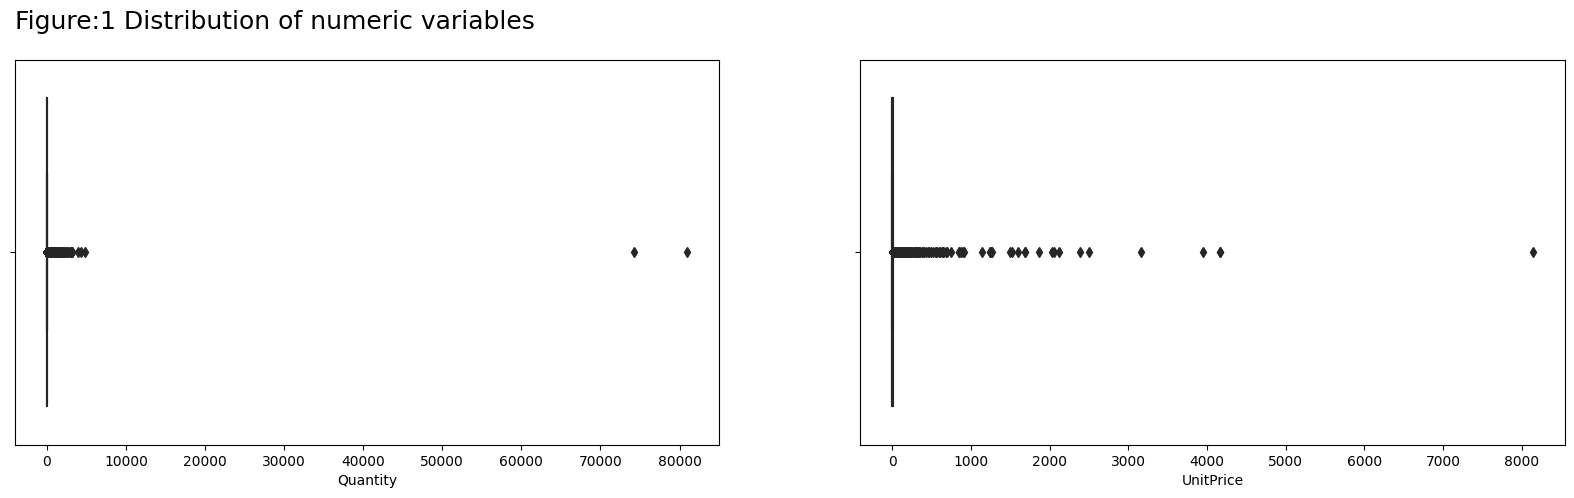

In [545]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle('Figure:1 Distribution of numeric variables', fontsize=18, ha='left', x=0.125)

sns.boxplot(x=df['Quantity'], ax=axs[0], color='purple')
sns.boxplot(x=df['UnitPrice'], ax=axs[1], color='purple')

plt.show()

The boxplots cofirms the presence of outliers

In [546]:
# Calcola il limite superiore e inferiore per gli outlier
# Puoi utilizzare metodi come il metodo dei quartili o l'intervallo interquartile per calcolare i limiti
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Rimuovi gli outlier
df = df[(df['Quantity'] >= lower_limit) & (df['Quantity'] <= upper_limit)]

In [547]:
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Rimuovi gli outlier
df= df[(df['UnitPrice'] >= lower_limit) & (df['UnitPrice'] <= upper_limit)]

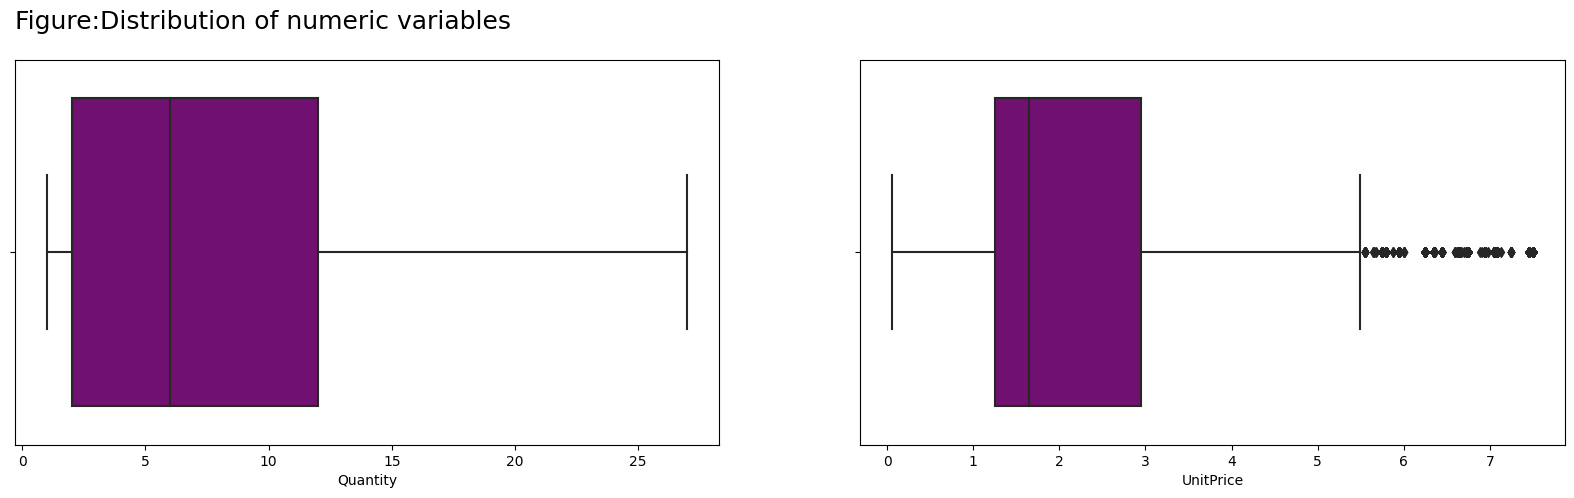

In [548]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle('Figure:Distribution of numeric variables', fontsize=18, ha='left', x=0.125)

sns.boxplot(x=df['Quantity'], ax=axs[0], color='purple')
sns.boxplot(x=df['UnitPrice'], ax=axs[1], color='purple')

plt.show()

Let's also see the distribution of 'InvoiceDate' columns.

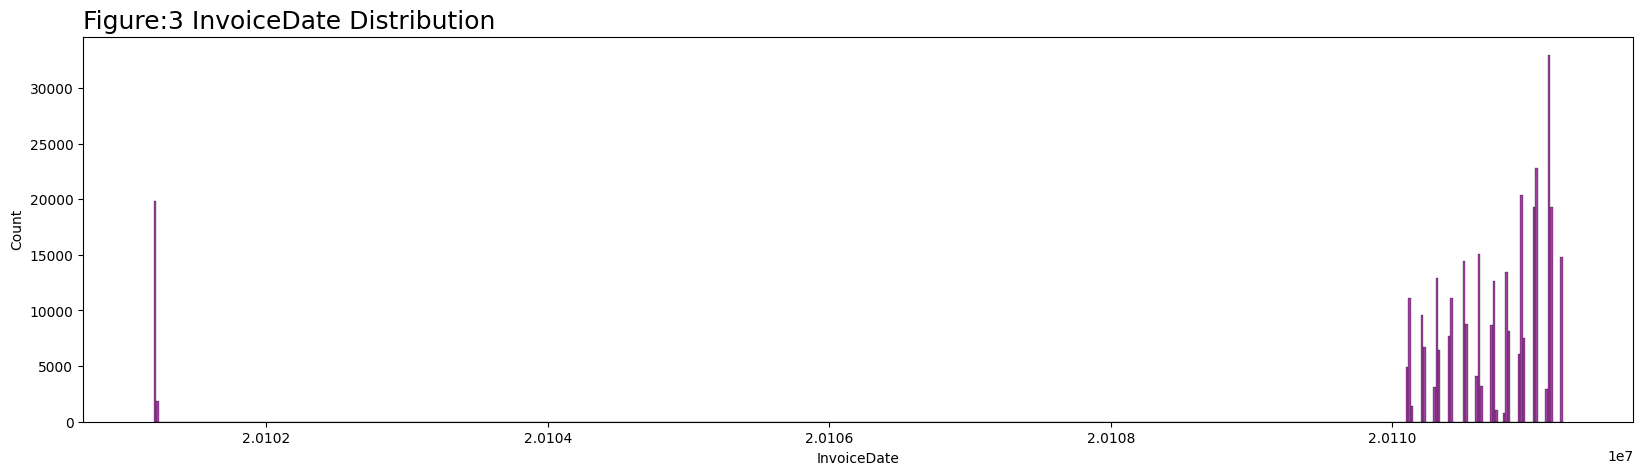

In [549]:
date_dist = pd.to_numeric(df['InvoiceDate'].dt.strftime('%Y%m%d'))

plt.figure(figsize=(20,5))

sns.histplot(date_dist, color='purple')

plt.title('Figure:3 InvoiceDate Distribution', fontsize=18, loc='left')
plt.show()

Sice the transactions majority has take into 2011 we will condudt our analysis only on the date related to 2011.

In [550]:
# Filtering df for 2011 datas
df = df[df['InvoiceDate'].dt.date >= pd.to_datetime('2011-01-01').date()]
df.shape

(311553, 8)

### Features Engeneering

In [551]:
# Defining new features for the analysis
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day_name()
df['InvoiceHour'] = df['InvoiceDate'].dt.hour
df['TotalRevenue'] = df.Quantity * df.UnitPrice

month_name = df['InvoiceDate'].dt.month_name()
df['MonthYear'] = month_name.str.cat(df['InvoiceYear'].astype(str), sep=' - ')

In [552]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,TotalRevenue,MonthYear
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011,1,Tuesday,10,19.5,January - 2011
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011,1,Tuesday,10,10.5,January - 2011
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011,1,Tuesday,10,10.5,January - 2011
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011,1,Tuesday,10,10.5,January - 2011
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011,1,Tuesday,10,12.5,January - 2011


### **What are the top 5 Countries where retail sell more product?**

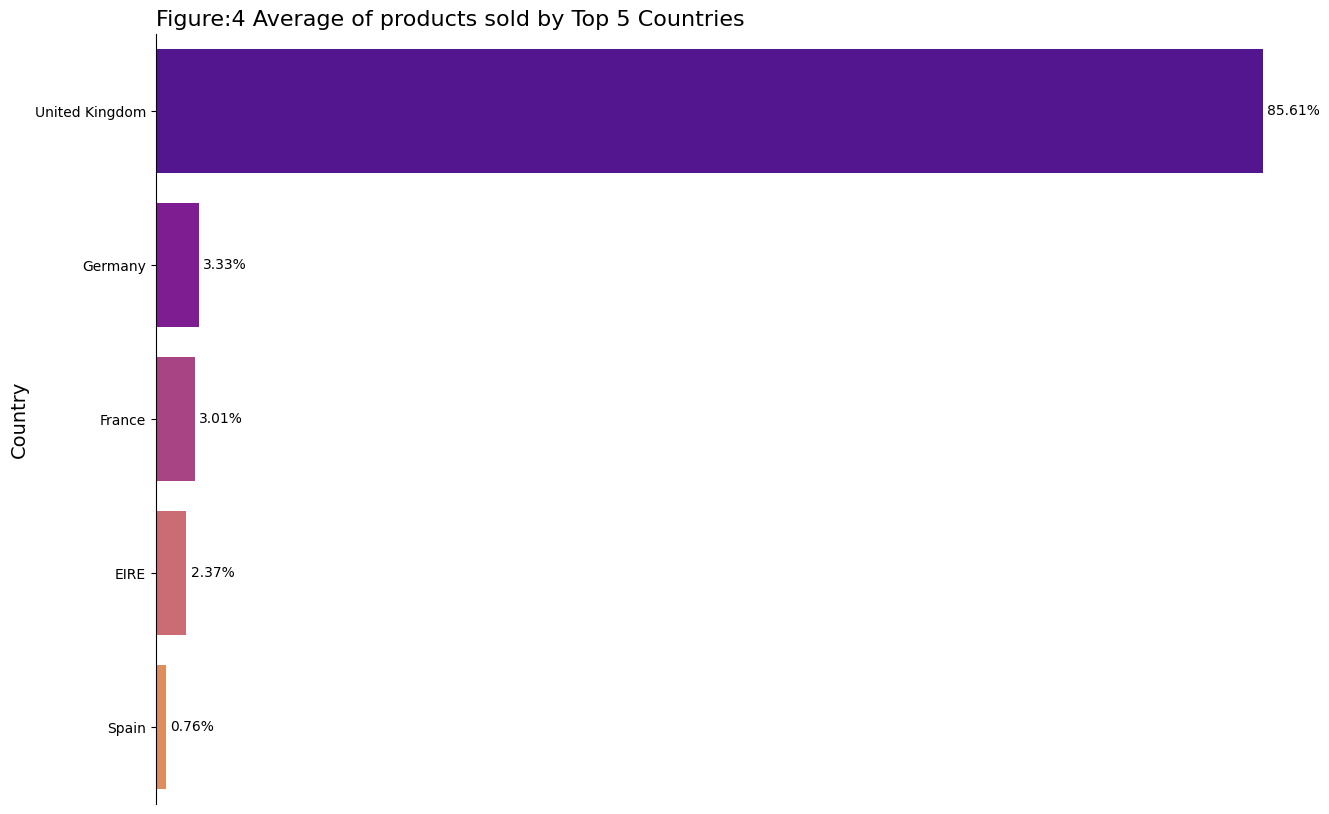

In [553]:
# Finding the average quantity sold over the total and grouping for countries
country_avg = (df.groupby('Country').Quantity.sum() / df.Quantity.sum()).mul(100)\
    .reset_index(name='avg_sold')\
    .sort_values('avg_sold', ascending=False)

fig , ax = plt.subplots(figsize=(15, 10))
palette = sns.color_palette('plasma')

sns.barplot(y='Country', x='avg_sold', data=country_avg[:5], palette=palette)

for bar in ax.patches:
    width = bar.get_width()
    x = width
    y = bar.get_y() + bar.get_height() / 2
    label = f"{width:.2f}%"
    ax.annotate(label, (x, y), 
                ha='left', va='center', 
                xytext=(3, 0), fontsize=10, 
                textcoords='offset points'
               )

sns.despine(bottom=True)
plt.title('Figure:4 Average of products sold by Top 5 Countries', fontsize=16, loc='left')
plt.ylabel('Country', fontsize=14)
plt.xlabel('')
plt.xticks([])
plt.show()

The plot above shows that the majority of the products are sold in the United Kingdom with a share of 85.61%, followed by the Germany at 3.33%, France  at 3.01%, EIRE at 2.37%, and Spain at 0.76%. 

**It is clear that United kindom has the largest catchment area for the company.**

### **How many products are sold in the top 5 countries?**

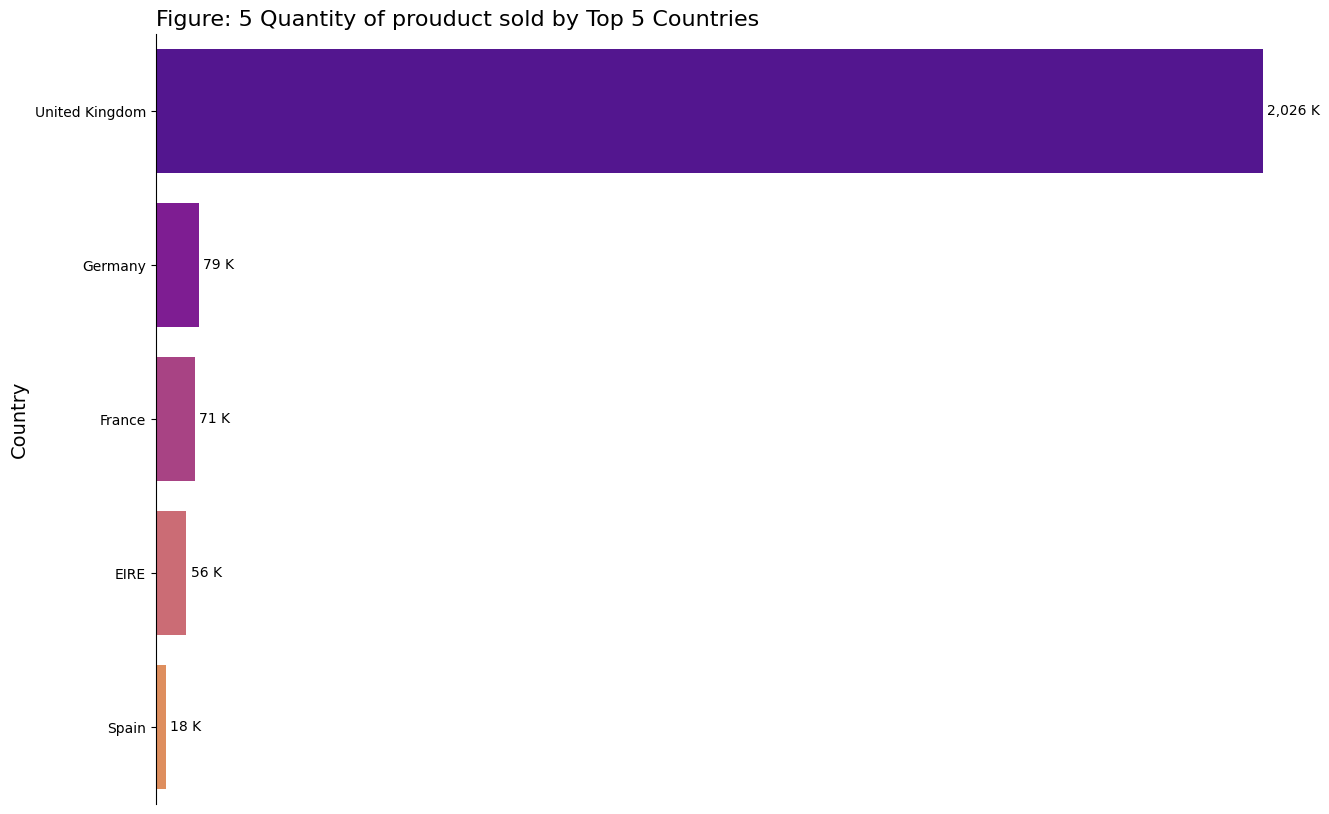

In [554]:
# Counting the product sold in each countries
count_products = country_avg = df.groupby('Country', as_index=False).Quantity.sum()\
    .sort_values('Quantity', ascending=False)

fig , ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='Quantity', y='Country', data=count_products[:5], palette=palette)

for bar in ax.patches:
    width = bar.get_width()
    x = width
    y = bar.get_y() + bar.get_height() / 2
    label = f"{round(width/1000):,} K"
    ax.annotate(label, (x, y), 
                ha='left', va='center', 
                xytext=(3, 0), fontsize=10, 
                textcoords='offset points'
               )

sns.despine(bottom=True)
plt.title('Figure: 5 Quantity of prouduct sold by Top 5 Countries', fontsize=16, loc='left')
plt.ylabel('Country', fontsize=14)
plt.xlabel('')
plt.xticks([])
plt.show()

As expected most of the products are sold in the UK with approximately 2 million units, then the Germany with 79K, France with 71K, EIRE 56K, and Spain 18K.

### **What is the revenue for the top 5 countries?**

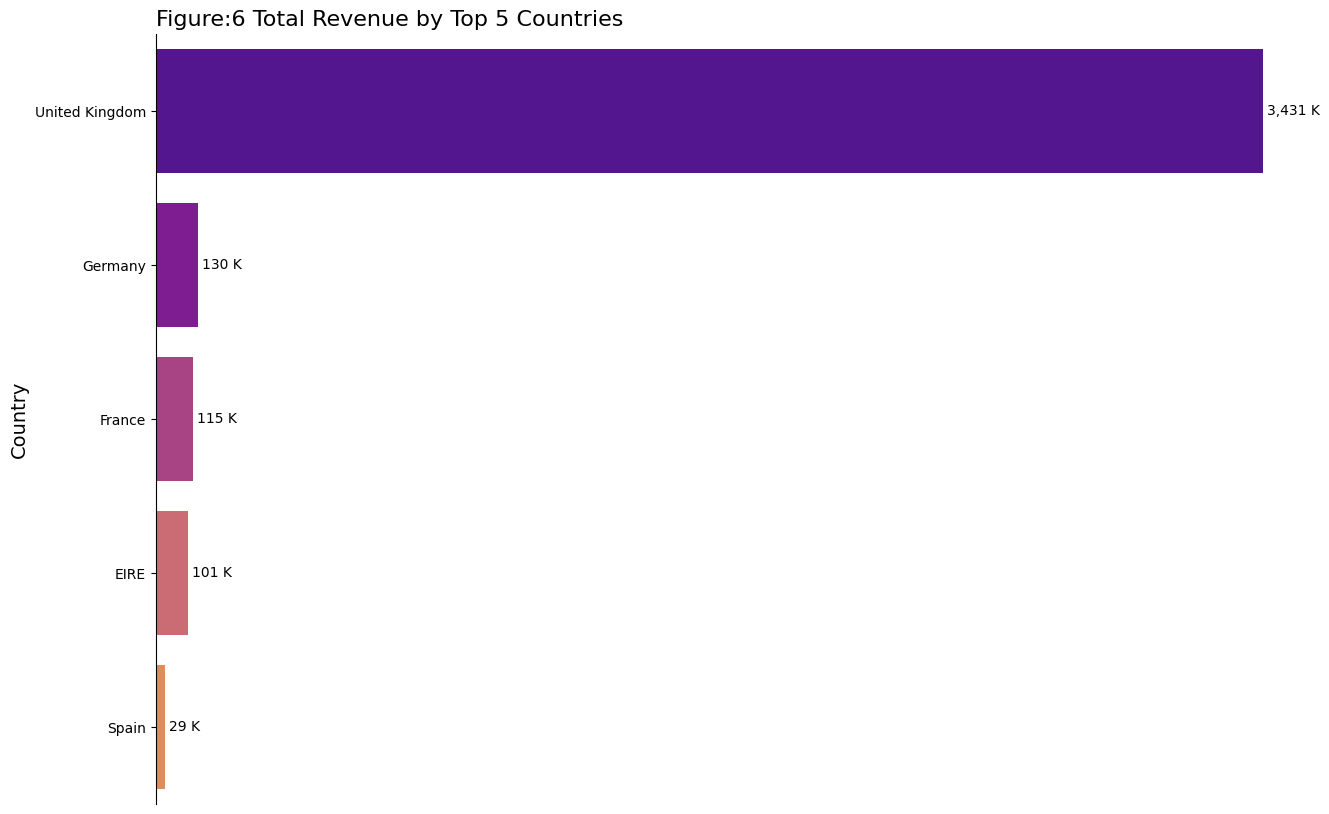

In [555]:
# Revenue sum for each counrty
revenue = df.groupby('Country', as_index=False).TotalRevenue.sum()\
    .sort_values('TotalRevenue', ascending=False)

fig , ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='TotalRevenue', y='Country', data=revenue[:5], palette=palette)

for bar in ax.patches:
    width = bar.get_width()
    x = width
    y = bar.get_y() + bar.get_height() / 2
    label = f"{round(width/1000):,} K"
    ax.annotate(label, (x, y), 
                ha='left', va='center', 
                xytext=(3, 0), fontsize=10, 
                textcoords='offset points'
               )

sns.despine(bottom=True)
plt.title('Figure:6 Total Revenue by Top 5 Countries', fontsize=16, loc='left')
plt.ylabel('Country', fontsize=14)
plt.xlabel('')
plt.xticks([])
plt.show()

The revenues for the top 5 countries are:
-   United Kingdom = 3.431.183,30
-	Germany	= 130.006,11
-	France = 115.191,15
-	EIRE = 100.522,81
-	Spain = 29.175,55

### **What are the top 10 best-seller products?**

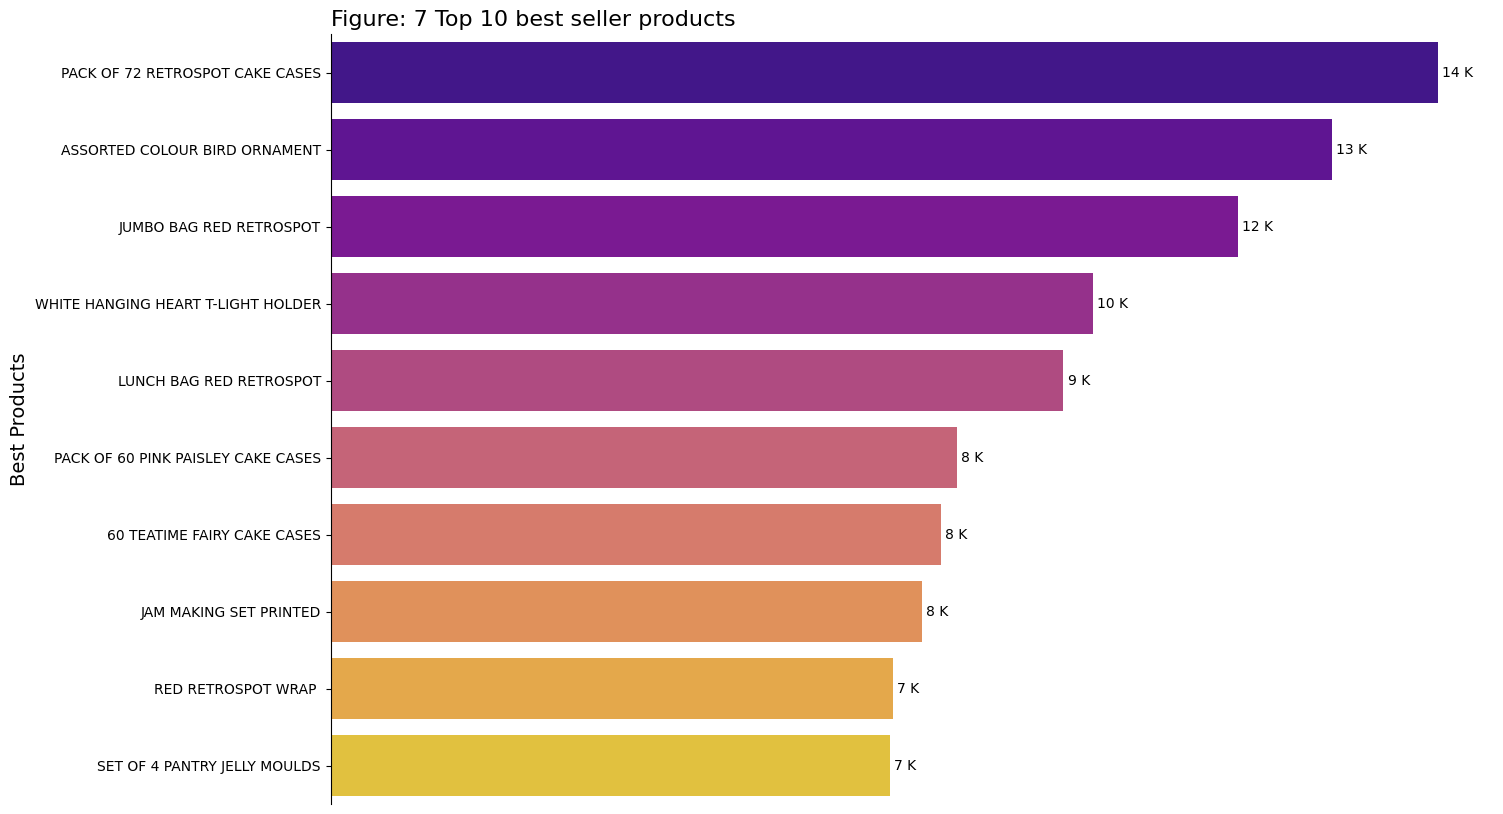

In [556]:
# Sum of the quantity sold for each product
best_seller = df.groupby('Description').Quantity.sum() \
    .sort_values(ascending=False).reset_index()

fig , ax = plt.subplots(figsize=(15, 10))
palette = sns.color_palette('plasma', n_colors=10)


sns.barplot(y='Description', x='Quantity', data=best_seller[:10], palette=palette)

for bar in ax.patches:
    width = bar.get_width()
    x = width
    y = bar.get_y() + bar.get_height() / 2
    label = f"{round(width/1000):,} K"
    ax.annotate(label, (x, y), 
                ha='left', va='center', 
                xytext=(3, 0), fontsize=10, 
                textcoords='offset points'
               )

sns.despine(bottom=True)
plt.title('Figure: 7 Top 10 best seller products', fontsize=16, loc='left')
plt.ylabel('Best Products', fontsize=14)
plt.xlabel('Number of product sold', fontsize=14)
plt.xlabel('')
plt.xticks([])
plt.show()

The top 10 best-sellers are:
1.   PACK OF 72 RETROSPOT CAKE CASES	
2.	ASSORTED COLOUR BIRD ORNAMENT	
3.	JUMBO BAG RED RETROSPOT		
4.	WHITE HANGING HEART T-LIGHT HOLDER	
5.	LUNCH BAG RED RETROSPOT		
6.	PACK OF 60 PINK PAISLEY CAKE CASES	
7.	60 TEATIME FAIRY CAKE CASES		
8.	JAM MAKING SET PRINTED	
9.	RED RETROSPOT WRAP	
10.	SET OF 4 PANTRY JELLY MOULDS	





### **What is the best-seller product for the top 5 countries?**

In [557]:
# Grouping by country and product and calculating the sum of quantities sold.
sales_by_product_and_country = df.groupby(['Country', 'Description']).Quantity.sum()

# Selecting the product index with the maximum quantity sold for each country
max_sales_by_country = sales_by_product_and_country.groupby('Country').idxmax()

# Selecting products corresponding to the maximum indices for each country
best_seller_by_country = sales_by_product_and_country.loc[max_sales_by_country]\
    .sort_values(ascending=False)\
    .reset_index(name='Quantity')

# Selecting only the top 5 countries for which to find the best-selling products
top_5_countries = country_avg[:5]['Country'].tolist()

# Filtering results only for previously selected countries
best_seller_by_country = best_seller_by_country[best_seller_by_country['Country'].isin(top_5_countries)]

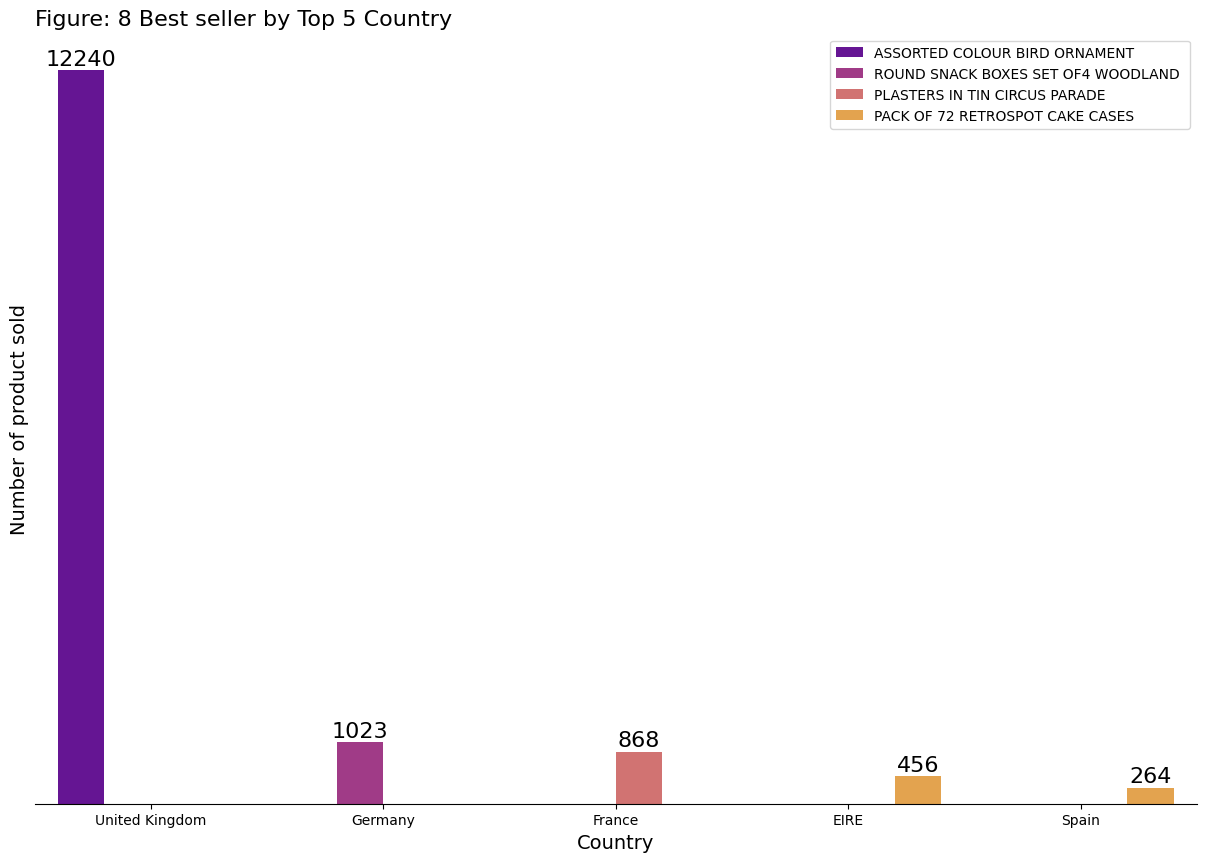

In [558]:
fig , ax = plt.subplots(figsize=(15, 10))
palette = sns.color_palette('plasma', n_colors=4)

sns.barplot(x='Country', y='Quantity', hue='Description',
            data=best_seller_by_country, 
            palette=palette)

for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f"{height:.0f}", xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', fontsize=16)

sns.despine(left=True)
plt.title('Figure: 8 Best seller by Top 5 Country', fontsize=16, loc='left')
plt.ylabel('Number of product sold', fontsize=14)
plt.legend()
plt.xlabel('Country', fontsize=14)
plt.yticks([])
plt.show()

- The United Kingdom best seller is ASSORTED COLOUR BIRD ORNAMENT which is the 2nd company best seller.
- The German best seller is ROUND SNACK BOXES SET OF4 WOODLAND.
- France's best-seller is PLASTERS IN TIN CIRCUS PARADE.
- For EIRE and Spain the best seller is PACK OF 72 RETROSPOT CAKE CASES which is the company's best seller.

### **What is the company's orders trend during the year?**

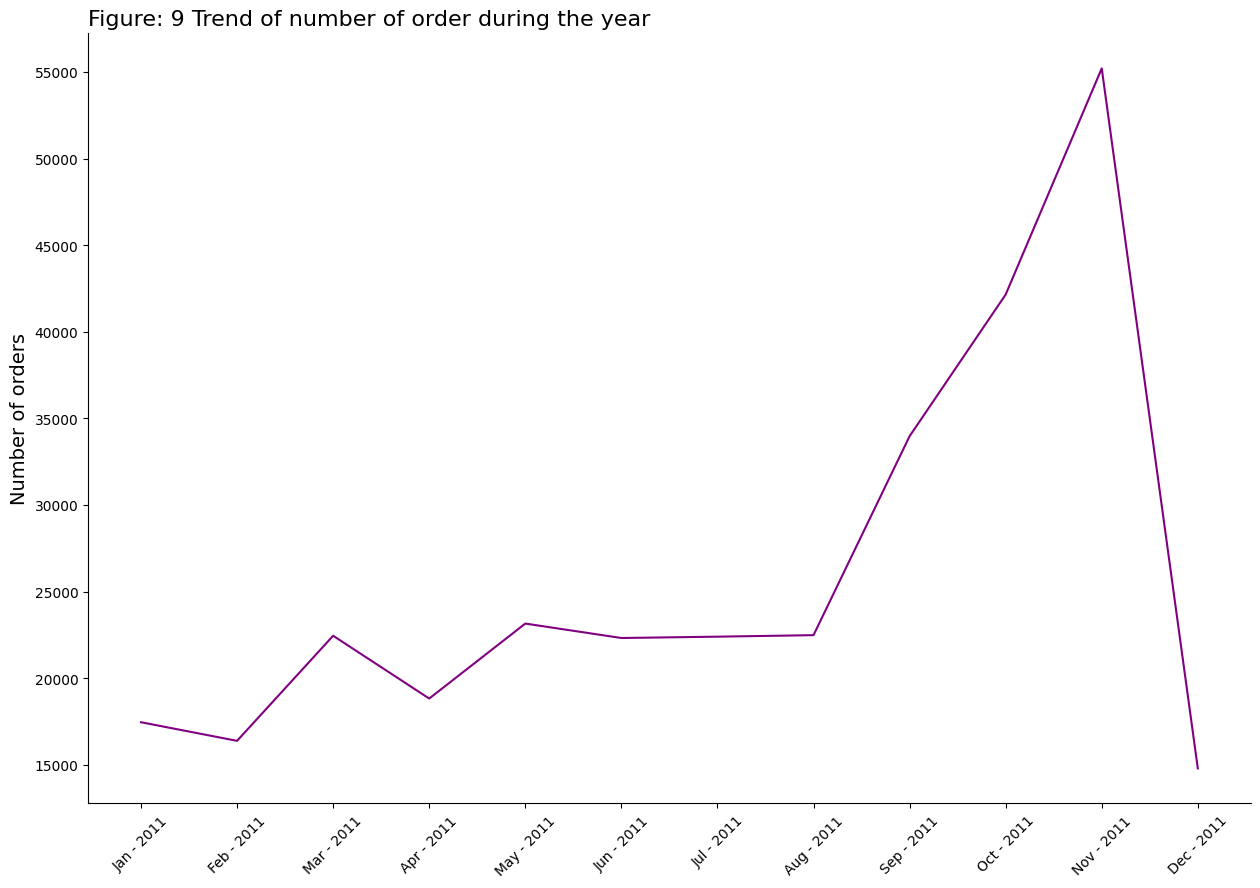

In [559]:
# Making a df copy
n_order = df.copy()

# Grouping the df by the 'MonthYear' column and returns the count of unique 'InvoiceNo'.
n_order = df.groupby('MonthYear', as_index=False).InvoiceNo.count()

# Converting the 'MonthYear' column into a pandas datetime object using the specified format.
n_order['MonthYear'] = pd.to_datetime(n_order['MonthYear'], format='%B - %Y')

# Sorting for 'MonthYear'
n_order = n_order.sort_values('MonthYear')

fig = plt.figure(figsize=(15, 10))
sns.lineplot(x=n_order['MonthYear'].dt.strftime('%b - %Y'),
             y="InvoiceNo",
             data=n_order,
             color='purple')


plt.title('Figure: 9 Trend of number of order during the year', fontsize=16, loc='left')
plt.ylabel('Number of orders', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=45)
sns.despine()
plt.show()


Generally, there is a positive trend in the number of orders placed until November and a rapid decline immediately afterward. It is possible to notice fluctuations in the first four months followed by a plateau phase until August. There is a sudden increase in orders from August to November, the month in which the maximum number of orders is reached (more than 60K) probably due to the fact, that people tend to prepare for Christmas during November.

### **What is the company's revenue trend during the year?**

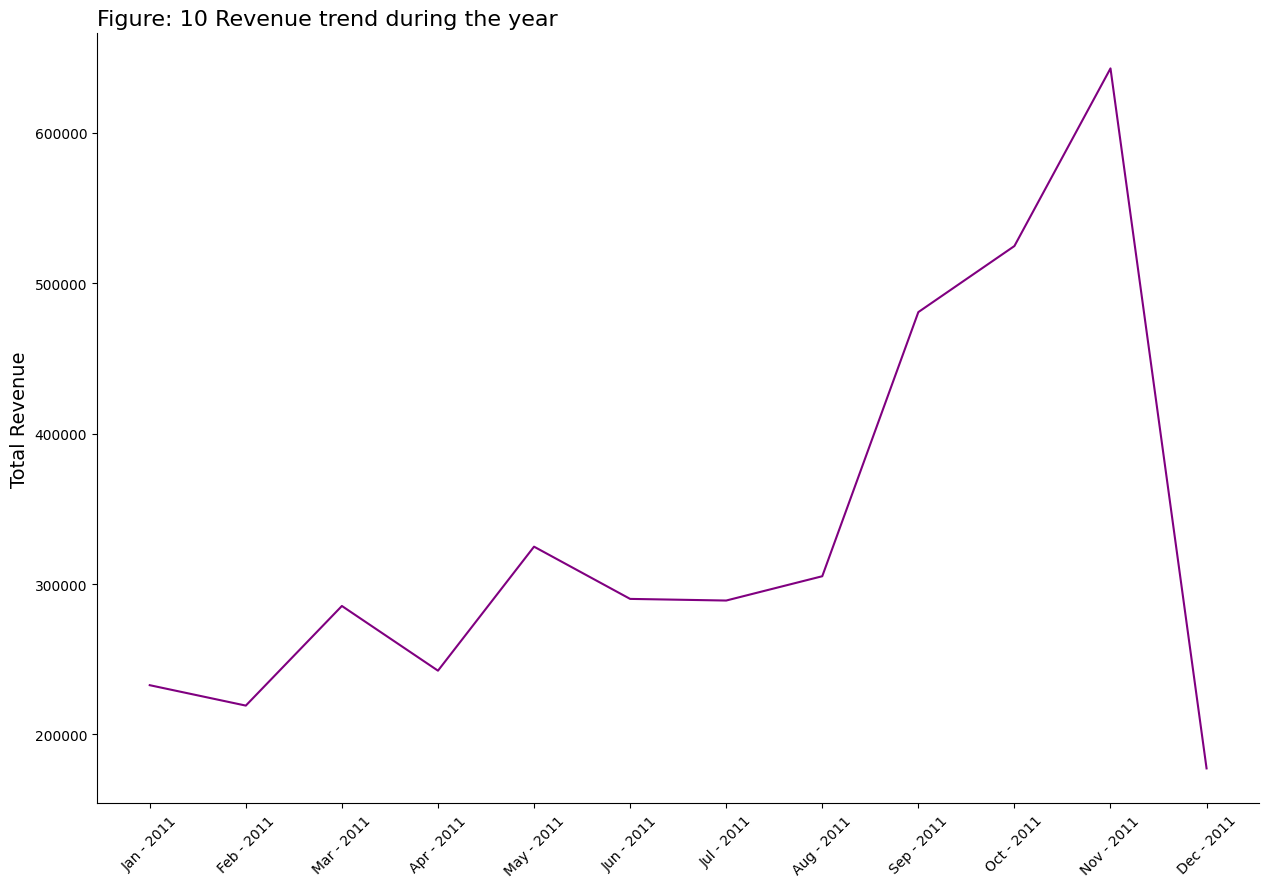

In [560]:
best_month = df.copy()

# Sum of revenue by each month of the year
best_month = df.groupby('MonthYear', as_index=False).TotalRevenue.sum()

# Converting the "MonthYear" column to datetime format
best_month['MonthYear'] = pd.to_datetime(best_month['MonthYear'], format='%B - %Y')

# Sorting df by the column "MonthYear"
best_month = best_month.sort_values('MonthYear')


fig = plt.figure(figsize=(15, 10))

sns.lineplot(x=best_month['MonthYear'].dt.strftime('%b - %Y'),
             y='TotalRevenue',
             data=best_month, color='purple')

plt.ylabel('Total Revenue', fontsize=14)
plt.title('Figure: 10 Revenue trend during the year', fontsize=16, loc='left')
plt.xlabel('')
plt.xticks(rotation=45)
sns.despine()
plt.show()

As expected the revenue trend follows the quantity of orders placed trend.

### **What is the day of the week when the most orders were placed?**

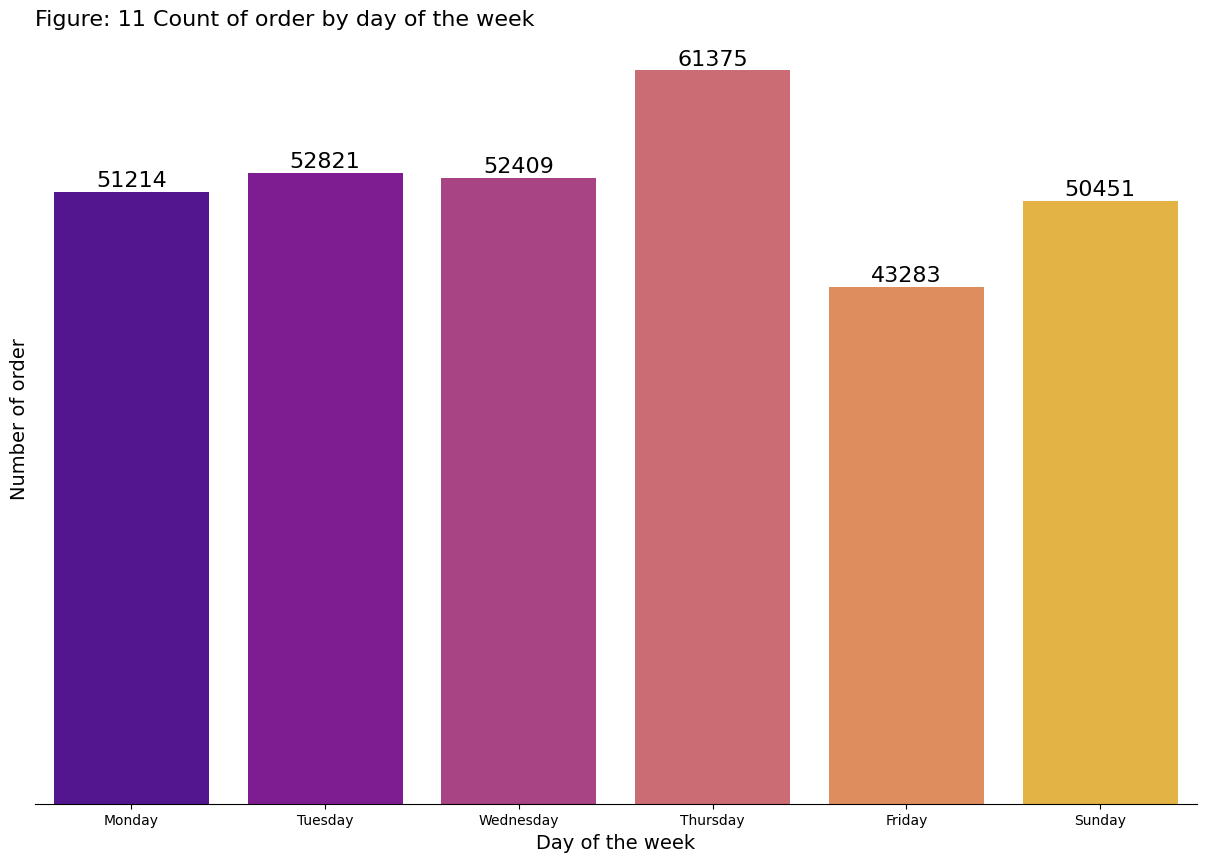

In [561]:
# Counting the number of invoices by day
day_orders = df.groupby('InvoiceDay', as_index=False).InvoiceNo.count()

fig, ax = plt.subplots(figsize=(15, 10))
palette = sns.color_palette('plasma', n_colors=6)

sns.barplot(x='InvoiceDay', 
            y="InvoiceNo", 
            data=day_orders, 
            palette=palette,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday'])

for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f"{height:.0f}", xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', fontsize=16)

sns.despine(left=True)
plt.yticks([])
plt.ylabel('Number of order', fontsize=14)
plt.xlabel('Day of the week', fontsize=14)
plt.title('Figure: 11 Count of order by day of the week ', fontsize=16, loc='left')
plt.show()

The number of orders does not vary significantly by day of the week, with Thursdays recording the most orders, while Fridays record fewer. It is strange that there are no orders on Saturday; perhaps some filtering was done during data collection.

### **What is the time when most orders are placed?**



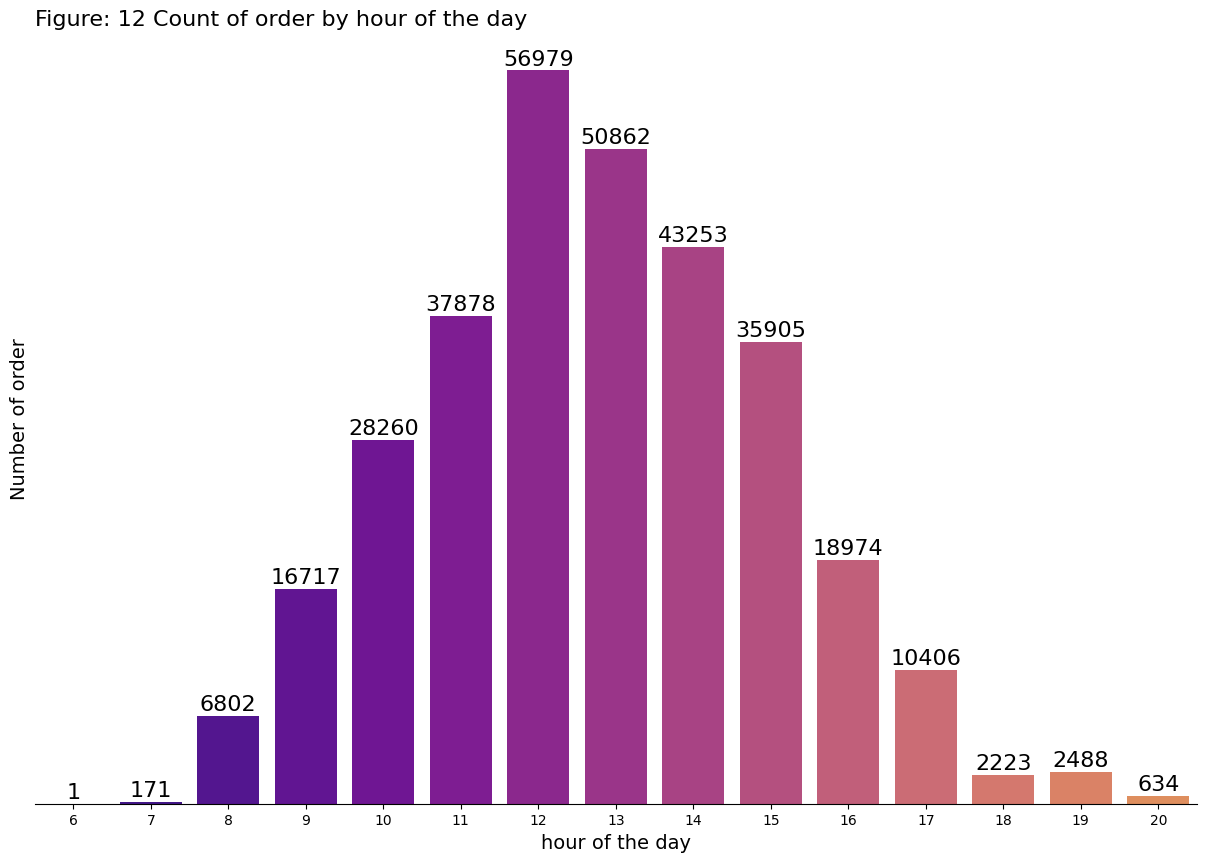

In [562]:
# Counting the number of invoice by hour
hour_orders = df.groupby('InvoiceHour', as_index=False).InvoiceNo.count()

fig, ax = plt.subplots(figsize=(15, 10))
palette = sns.color_palette('plasma', n_colors=20)

sns.barplot(x='InvoiceHour', y="InvoiceNo", data=hour_orders, palette=palette)

for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f"{height:.0f}", xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', fontsize=16)

sns.despine(left=True)
plt.yticks([])
plt.ylabel('Number of order', fontsize=14)
plt.xlabel('hour of the day', fontsize=14)
plt.title('Figure: 12 Count of order by hour of the day', fontsize=16, loc='left')
plt.show()

Most orders are placed between 12:00 and 2:00 p.m., which means customers tend to purchase during their lunch break. There are no orders recorded between 20:00 and 6:00.

<a name="cohort-analysis"></a>
##5. Cohort Analysis 

Cohort analysis is a powerful tool used in marketing to track and analyze groups of customers who share similar characteristics or experiences. By dividing customers into cohorts and observing their behavior over time, businesses can gain valuable insights into customer retention, lifetime value, and overall business performance. Cohort analysis can help businesses identify trends and patterns in customer behavior, make data-driven decisions, and optimize their marketing strategies to better meet the needs of their target audience.

In [563]:
# Defining functions for analysis 
def get_month(x):
    """
    Returns a datetime object with the year and month of `x`, and the day set to 1.
    """
    return dt.datetime(x.year, x.month, 1)

def get_date_int(df, column):
    """
    Returns a tuple containing three numpy arrays:
    `year`, `month`, and `day`, which contain the extracted year, month, and day values
    from the date column of the given dataframe `df`.
    """    
    year = df[column].dt.year    
    month = df[column].dt.month    
    day = df[column].dt.day
    return year, month, day

In [564]:
# Create a new column 'InvoiceMonth' which contains the month, year, and the day set to 1.
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)

# Grouping by 'CustomerID' and 'InvoiceMonth', getting the minimum 'InvoiceMonth' for each group.
grouping = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')

# Extract the year and month from 'InvoiceMonth' and 'CohortMonth'
invoice_year, invoice_month, _ = get_date_int(df, 'InvoiceMonth') 
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')

# Calculate the difference in years and months between them.
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

# Calculate the cohort index.
df['CohortIndex'] = years_diff * 12 + months_diff + 1

# Convert 'CohortMonth' to date format.
df['CohortMonth'] = df.CohortMonth.dt.date

# Group the dataframe by 'CohortMonth' and 'CohortIndex'.
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique customers in each group.
cohort_data = grouping['CustomerID'].nunique().reset_index()

# Reshape the data to pivot table.
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='CustomerID')

# Get the size of each cohort.
cohort_size = cohort_counts.iloc[:, 0]

# Calculate the retention rate for each cohort.
retention = cohort_counts.divide(cohort_size, axis=0).round(3)


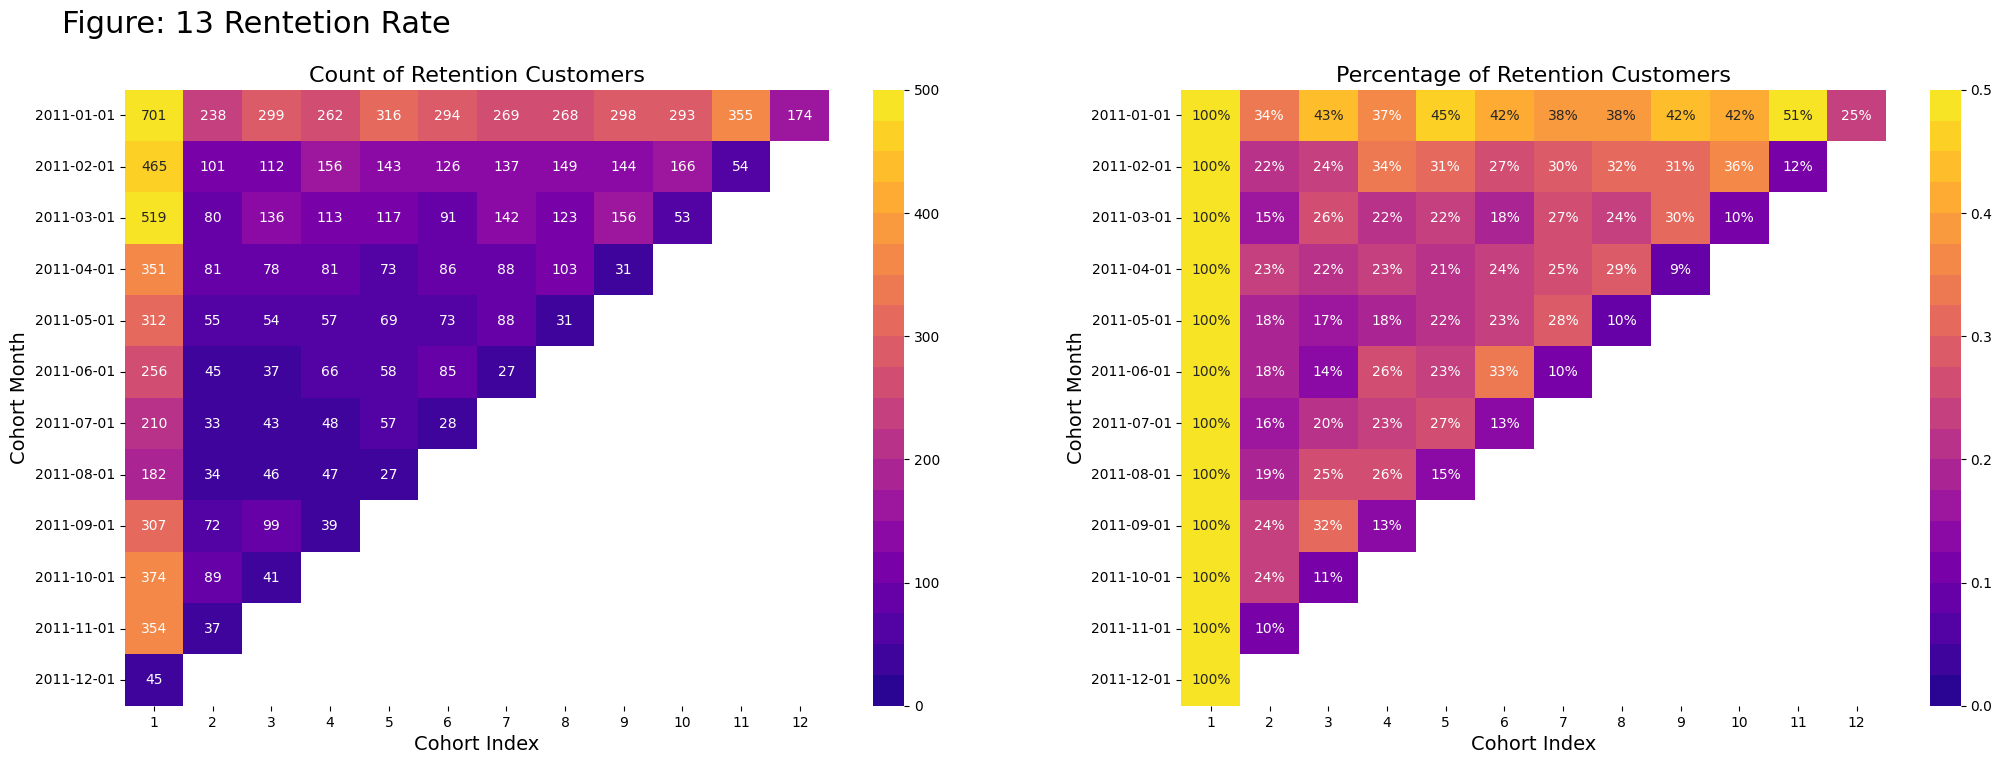

In [565]:
fig, axs = plt.subplots(1, 2, figsize=(25, 8))
fig.suptitle('Figure: 13 Rentetion Rate', fontsize=22, ha='left', x=0.1)

sns.heatmap(cohort_counts, annot=True, fmt='.0f', vmin=0, vmax=500, cmap=palette, ax=axs[0])
sns.heatmap(retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap=palette, ax=axs[1])

axs[0].set_title('Count of Retention Customers', fontsize=16)
axs[1].set_title('Percentage of Retention Customers', fontsize=16)
axs[0].set_xlabel('Cohort Index', fontsize=14)
axs[1].set_xlabel('Cohort Index', fontsize=14)
axs[0].set_ylabel('Cohort Month', fontsize=14)
axs[1].set_ylabel('Cohort Month', fontsize=14)
plt.show()


It is evident that the retention rates of the customers vary depending on their cohort. For example, the January 2011 cohort maintained a consistently high retention rate throughout the year, whereas the June 2011 cohort started slowly but eventually achieved a higher retention rate in the later months.

It is worth noting that after the initial month of enrollment, roughly 20% of consumers continue to use the platform actively.

<a name="rfm-segmentation"></a>
##6. RFM Segmentation

RFM analysis is a customer segmentation technique that stands for Recency, Frequency, and Monetary Value. It is used to identify and group customers based on their purchasing behavior, with the aim of creating targeted marketing strategies to improve customer engagement and retention. 
- Recency refers to the time since a customer's last purchase. 
- Frequency refers to how often a customer makes a purchase.
- Monetary value refers to the amount of money a customer spends. 

By analyzing these three variables, businesses can identify their most valuable customers and tailor their marketing efforts accordingly.

In [566]:
# Find the maximum invoice date add 1 day to it.
snapshot_date = df.InvoiceDate.max() + dt.timedelta(days=1)

# Group df by 'CustomerID', and for each group calculate Recency, Frequency, and MonetaryValue.
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo' : 'count',
    'TotalRevenue' : 'sum'
})

# Rename the columns of 'rfm' to better reflect their meaning.
rfm.rename(columns = {'InvoiceDate': 'Recency',
                      'InvoiceNo': 'Frequency',
                      'TotalRevenue': 'MonetaryValue'}, inplace=True)

# Calculate quartiles for Recency, Frequency, and MonetaryValue.
r_quartiles = pd.qcut(rfm.Recency, q=4, labels=np.arange(4, 0, -1))
f_quartiles = pd.qcut(rfm.Frequency, q=4, labels=np.arange(1, 5, 1))
m_quartiles = pd.qcut(rfm.MonetaryValue, q=4, labels=np.arange(1, 5, 1))

# Add new columns to 'rfm' containing the quartile labels for Recency, Frequency, and MonetaryValue.
rfm = rfm.assign(R = r_quartiles.values,
                 F = f_quartiles.values,
                 M = m_quartiles.values)

# Define a function that concatenates the values in the R, F, and M columns into a single string.
def join_rfm(x):
    return int(x['R']) * 100 + int(x['F']) * 10 + int(x['M'])

# Apply the 'join_rfm' function to each row of 'rfm' to create a new column 'RFM_Segment'.
rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)

# Add a new column 'RFM_Score' to 'rfm' containing the sum of the R, F, and M values for each row.
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

# Sort 'rfm' by 'RFM_Score' in descending order.
rfm.sort_values('RFM_Score', ascending=False)

# Group by 'RFM_Segment' and count the number of customers in each segment, select the top 10.
rfm.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]


RFM_Segment
444    412
111    385
344    210
122    192
211    186
222    162
233    154
333    152
433    128
311    121
dtype: int64

In [567]:
# Group by 'RFM_Score' and calculate metrics.
rfm.groupby('RFM_Score').agg({'Recency': 'mean',
                              'Frequency': 'mean',
                              'MonetaryValue': ['mean', 'count']
                              }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           236.2       6.5         101.0   385
4           150.9      11.4         153.7   364
5           136.5      16.6         241.1   454
6            87.0      23.4         295.4   432
7            81.0      33.8         461.9   424
8            55.0      46.2         596.6   431
9            47.1      65.5         875.5   380
10           33.2      98.7        1233.3   422
11           20.2     156.0        2052.4   372
12            6.9     311.6        3917.0   412

In [568]:
# Defining a funtion to segment customers
def segment_me(df):
    if df['RFM_Score'] <= 4:
        return'*'
    elif (df['RFM_Score'] == 5) or (df['RFM_Score'] == 6):
        return'**'
    elif (df['RFM_Score'] == 7) or (df['RFM_Score'] == 8):
        return'***'
    elif (df['RFM_Score'] == 9) or (df['RFM_Score'] == 10):
        return'****'
    else:
        return'*****'

# Apply the segment_me function to each row of the rfm dataframe. 
rfm['Customer_stars_segments'] = rfm.apply(segment_me, axis=1)

# Group the rfm dataframe by 'Customer_stars_segments' and calculate the metrics.
rfm.groupby('Customer_stars_segments').agg({'Recency': 'mean',
                                            'Frequency': 'mean',
                                            'MonetaryValue': ['mean', 'count']
                                            }).round(1).sort_values(('Recency', 'mean'))

Recency Frequency MonetaryValue      
                           mean      mean          mean count
Customer_stars_segments                                      
*****                      13.2     237.8        3032.3   784
****                       39.8      83.0        1063.8   802
***                        67.9      40.1         529.8   855
**                        112.4      19.9         267.6   886
*                         194.7       8.9         126.6   749

Online Retail customers have been segmented into five groups using RFM analysis, based on their Recency, Frequency, and Monetary Value scores. The highest average values for all three variables were observed in the 5-stars segment, indicating that these customers are the most valuable. Conversely, the 1-star segment had the lowest average values for all three variables, implying that these customers are the least valuable.

This information can be used by the company to develop targeted marketing strategies for each segment, with a focus on retaining and engaging high-value customers while potentially re-engaging or reactivating low-value customers.

<a name="k-means-clustering"></a>
##7. K-Means Clustering<a name="K-Means Clustering"></a>

K-means clustering is a popular unsupervised machine learning algorithm that can be used for customer segmentation in marketing. By grouping customers based on shared characteristics like demographics, purchase history, and behavior patterns, businesses can tailor their marketing efforts to better meet the needs of each segment. K-means clustering is particularly useful for large datasets and can help identify previously unseen patterns in customer behavior.

### Data Preprocessing

To properly deal with K-Means Clustering it is necessary:
- Symmetric distribution of all variables.
- Variables must have the same average.
- Variables must have the same standard deviation.

Let's check the first assumption.

In [569]:
# Define a df to use for the Kmeans clustering
df_to_cluster = rfm[['Recency', 'Frequency', 'MonetaryValue']]

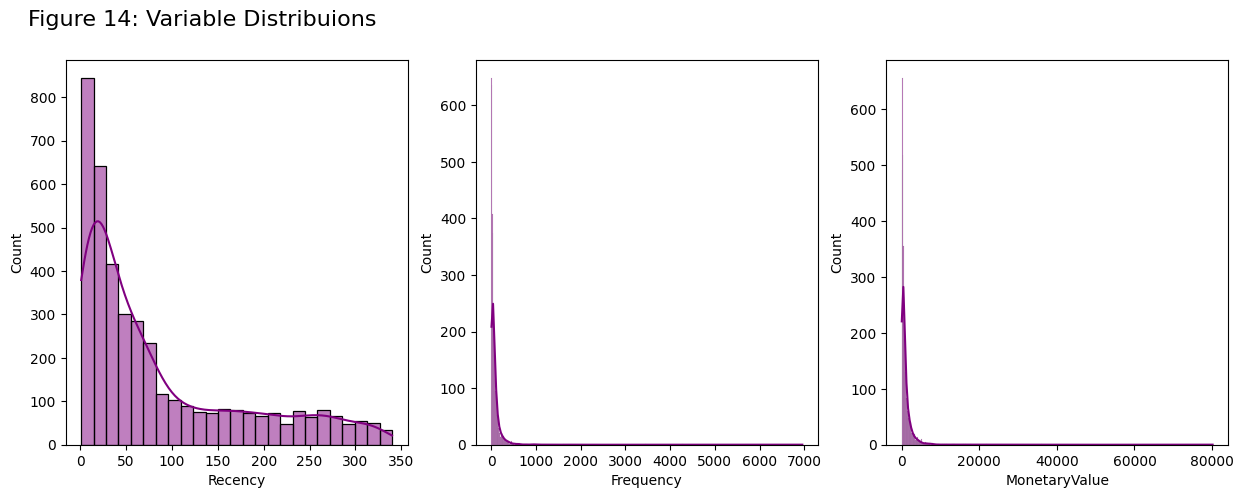

In [570]:
# Check distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Figure 14: Variable Distribuions", fontsize=16, ha='left', x=0.1)

for i, col in enumerate(df_to_cluster.columns):
    sns.histplot(df_to_cluster[col], kde=True, ax=axes[i], color='purple')

All variables are skewed it is necessary to perform some transformations. Since there are only positive values, we will apply a box-cox transformation.

In [571]:
# Apply box-cox trasformation
bc = PowerTransformer(method='box-cox')
bc_norm = bc.fit_transform(df_to_cluster)

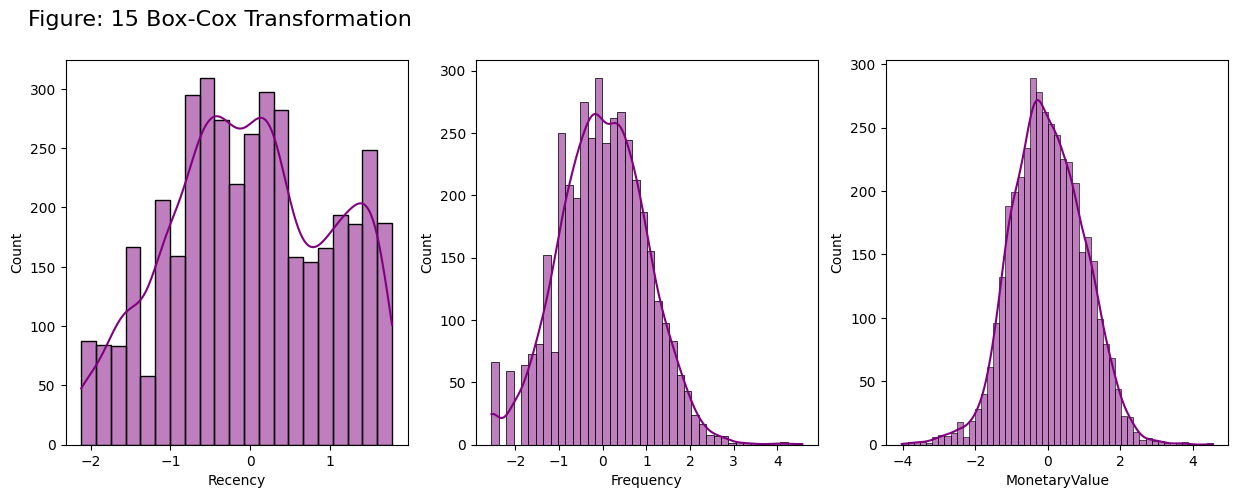

In [572]:
# Check distribuion after normalization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Figure: 15 Box-Cox Transformation", fontsize=16, ha='left', x=0.1)

for i, col in enumerate(df_to_cluster.columns):
    sns.histplot(bc_norm[:, i], kde=True, ax=axes[i], color='purple')
    axes[i].set_xlabel(col)

As we see from the plot above, after the transformation we improved all the skewness.

Let's now perform a standardization on our normalized data in order to get the same mean and standard deviation.

In [573]:
# Scaling norfalized df
scaler = StandardScaler()
bc_norm_scaled = scaler.fit_transform(bc_norm)
print(f"Check Mead and std:\n",
      f"Mean: {bc_norm_scaled.mean(axis=0).round(2)}\n",
      f"std: {bc_norm_scaled.std(axis=0)}")

df_preprocessed = pd.DataFrame(data=bc_norm_scaled, index=df_to_cluster.index, columns=df_to_cluster.columns)

Check Mead and std:
 Mean: [ 0.  0. -0.]
 std: [1. 1. 1.]


### Finding optimal K

After normalizing and scaling the data we need to find the correct number of clusters. Firstly, we do this through the elbow method, and then we dig drill with the silhouette analysis to compare the results.

In [574]:
# Instantiate a seed
seed = np.random.seed(217)

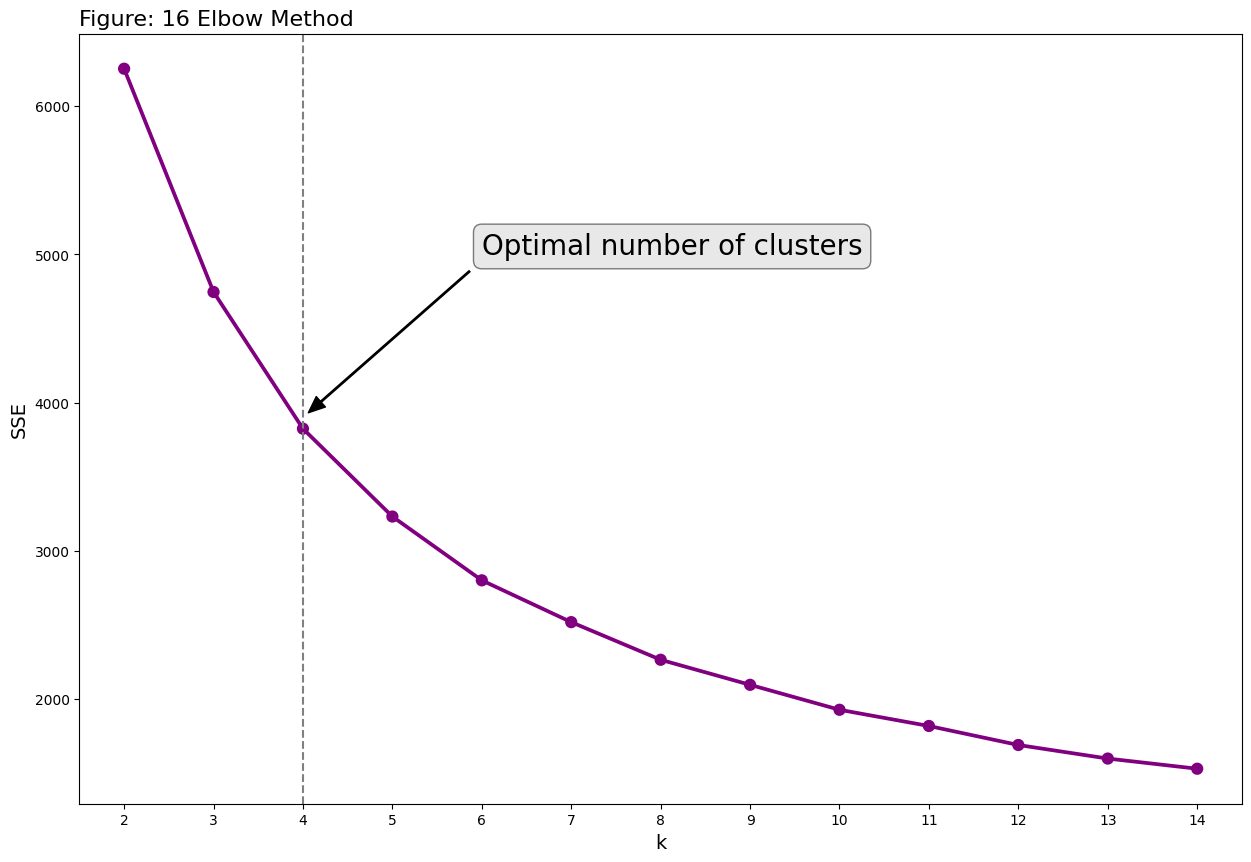

In [575]:
# Finding the optimal number of clusters
sse = {}
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=seed)
    kmeans.fit(df_preprocessed)
    sse[k] = kmeans.inertia_

# Plot SSE values for each key in the dictionary
fig, ax = plt.subplots(figsize=(15,10))
sns.pointplot(x=list(sse.keys()), y=list(sse.values()), color='purple')
ax.axvline(x=2, linestyle='--', color='grey')
ax.annotate('Optimal number of clusters',
            xy=(2,3900), xytext=(4,5000),fontsize=20,
            arrowprops=dict(facecolor='black',headwidth=10, shrink=0.03, width=1),
            bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round', alpha=0.5))

plt.title('Figure: 16 Elbow Method', fontsize=16, loc='left')
plt.xlabel('k', fontsize=14)
plt.ylabel('SSE', fontsize=14)
plt.show()

It seems that the proper number of clusters is 4.

Let's see what the silhouette analysis says. 
A common practice is to choose several options around the optimal value to test what makes most sense. So we will perform the silhouette analysis within 2, 3, 4, and 5 clusters. 

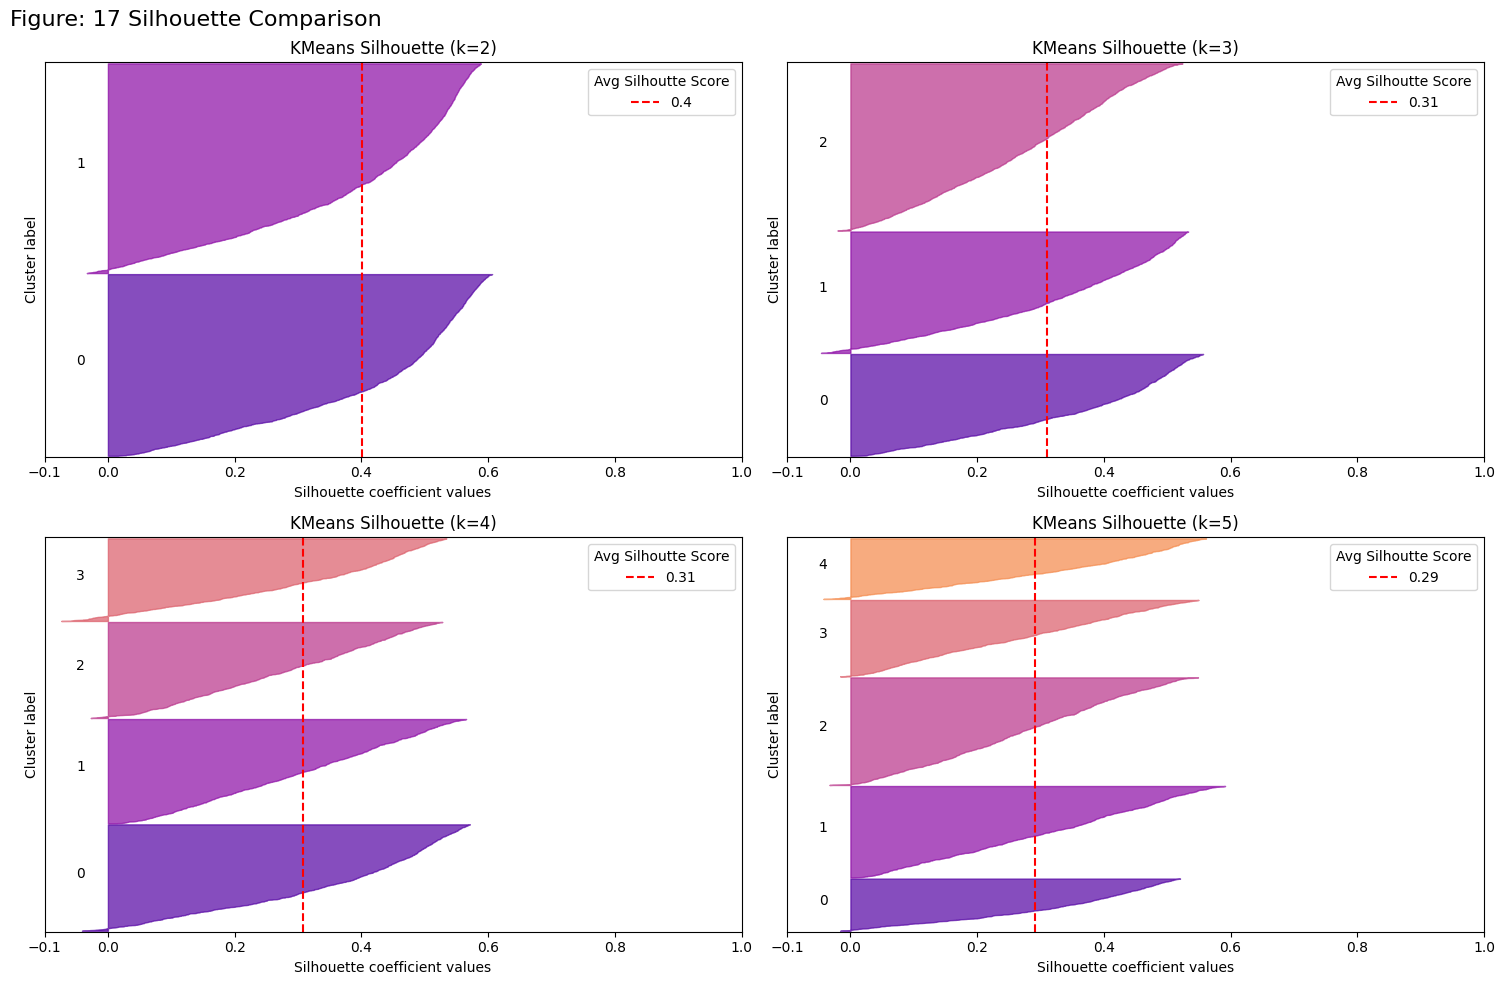

In [576]:
palette = sns.color_palette('plasma')
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle('Figure: 17 Silhouette Comparison', fontsize=16, ha='left', x=0)

# Iterate over a range of values for the number of clusters
for n_clusters in range(2, 6):
    # Calculate the row and column indices for the current subplot
    row = (n_clusters - 2) // 2
    col = (n_clusters - 2) % 2
    # Select the current subplot
    ax = axs[row][col]

    # Set the x-axis and y-axis limits for the subplot
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(df_preprocessed) + (n_clusters + 1) * 10])

    # Create a KMeans clusterer with the current number of clusters
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    # Fit the clusterer to the preprocessed data and obtain cluster labels
    cluster_labels = clusterer.fit_predict(df_preprocessed)

    # Calculate the average silhouette score for the clustering
    silhouette_avg = silhouette_score(df_preprocessed, cluster_labels)

    # Calculate the silhouette values for each sample in the data
    sample_silhouette_values = silhouette_samples(df_preprocessed, cluster_labels)

    # Add a vertical line to the plot representing the average silhouette score
    ax.axvline(x=silhouette_avg, color="red", linestyle="--", label=silhouette_avg.round(2))

    # Initialize the lower y-coordinate for the silhouette plot
    y_lower = 10

    # Iterate over each cluster
    for i in range(n_clusters):
        # Select the silhouette values for the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette values in ascending order
        ith_cluster_silhouette_values.sort()

        # Calculate the size of the current cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        # Calculate the upper y-coordinate for the silhouette plot
        y_upper = y_lower + size_cluster_i

        # Select the color for the current cluster
        color = palette[i]
        # Fill the area between the silhouette plot and the y-axis for the current cluster
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Add a label with the cluster number at a fixed position within the silhouette plot
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Update the lower y-coordinate for the next cluster
        y_lower = y_upper + 10  

    ax.set_title(f"KMeans Silhouette (k={n_clusters})")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    ax.legend(title='Avg Silhoutte Score', loc='upper right')
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.tight_layout()
plt.show()


The silhouette analysis shows that we can obtain the best performance with 2 clusters. For the purpose of our analysis, a segmentation with only two clusters can lead us to a loss of insights into the customer's behaviors, so we will also build our K-Means model with 3 and 4 clusters.

### Model Implementation

In [577]:
# Initialize KMeans
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=seed) 
# Fit k-means clustering on the normalized data set
kmeans.fit(df_to_cluster)
# Extract cluster labels
cluster_labels = kmeans.labels_

# Create a new DataFrame by adding a cluster label column to datamart_rfmt
clustered_k2 = df_to_cluster.assign(Cluster=cluster_labels)

# Group by cluster and compute metrics
grouped_2k = clustered_k2.groupby(['Cluster']).agg({'Recency': 'mean',
                                               'Frequency': 'mean',
                                               'MonetaryValue': ['mean', 'count']})\
                                               .round(1).sort_values(('Recency', 'mean'))

grouped_2k

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
1           9.9     804.7       11287.4    62
0          86.0      65.2         826.0  4014

In [578]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=seed) 
# Fit k-means clustering on the normalized data set
kmeans.fit(df_to_cluster)
# Extract cluster labels
cluster_labels = kmeans.labels_

# Create a new DataFrame by adding a cluster label column to datamart_rfmt
clustered_k3 = df_to_cluster.assign(Cluster=cluster_labels)

# Group by cluster and compute metrics
grouped_3k = clustered_k3.groupby(['Cluster']).agg({'Recency': 'mean',
                                               'Frequency': 'mean',
                                               'MonetaryValue': ['mean', 'count']})\
                                               .round(1).sort_values(('Recency', 'mean'))

grouped_3k

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
2           2.8    4273.5       44997.0     4
0          16.7     313.3        4637.9   322
1          90.8      51.6         624.5  3750

In [579]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=seed) 
# Fit k-means clustering on the normalized data set
kmeans.fit(df_to_cluster)
# Extract cluster labels
cluster_labels = kmeans.labels_

# Create a new DataFrame by adding a cluster label column to datamart_rfmt
clustered_k4 = df_to_cluster.assign(Cluster=cluster_labels)

# Group by cluster and compute metrics
grouped_4k = clustered_k4.groupby(['Cluster']).agg({'Recency': 'mean',
                                               'Frequency': 'mean',
                                               'MonetaryValue': ['mean', 'count']})\
                                               .round(1).sort_values(('Recency', 'mean'))

grouped_4k

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
1           1.0    4275.0       80154.9     1
2           5.1    1562.2       18266.4    16
3          21.5     247.6        3620.4   450
0          93.1      47.3         558.0  3609

Even if the silhouette analysis suggested that we can obtain the best performance with 2 clusters it is clear that we have got more details with 3 and 4 clusters. Actually, it seems that it is the latter that has the better performance. Let's use a graphic method to compare this performance.

###Snakeplot and relative importances attribute


Snake plots and the relative importance of cluster attributes are two techniques commonly used in data analysis and visualization to gain insights into the behaviors of customers. 

Snake plots visually compare the behavior of different customer groups across multiple variables, helping identify patterns and trends. The relative importance of cluster attributes determines the significance of variables in defining customer clusters, aiding in interpreting clustering results and guiding targeted marketing strategies.

In [580]:
df_norm = pd.DataFrame(data=bc_norm, index=df_to_cluster.index, columns=df_to_cluster.columns)

In [581]:
df_norm['Cluster'] = clustered_k2['Cluster']

# Melt the normalized dataset and reset the index
df_melt_k2 = pd.melt(df_norm.reset_index(),
                  id_vars=['CustomerID', 'Cluster'],
                  value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                  var_name='Metric', value_name='Value'
                  )

In [582]:
df_norm['Cluster'] = clustered_k3['Cluster']

# Melt the normalized dataset and reset the index
df_melt_k3 = pd.melt(df_norm.reset_index(),
                  id_vars=['CustomerID', 'Cluster'],
                  value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                  var_name='Metric', value_name='Value'
                  )

In [583]:
df_norm['Cluster'] = clustered_k4['Cluster']

# Melt the normalized dataset and reset the index
df_melt_k4 = pd.melt(df_norm.reset_index(),
                  id_vars=['CustomerID', 'Cluster'],
                  value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                  var_name='Metric', value_name='Value'
                  )

<ipython-input-584-e504d4ed9d67>:5: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.

<ipython-input-584-e504d4ed9d67>:6: UserWarning:

The palette list has more values (6) than needed (3), which may not be intended.

<ipython-input-584-e504d4ed9d67>:7: UserWarning:

The palette list has more values (6) than needed (4), which may not be intended.



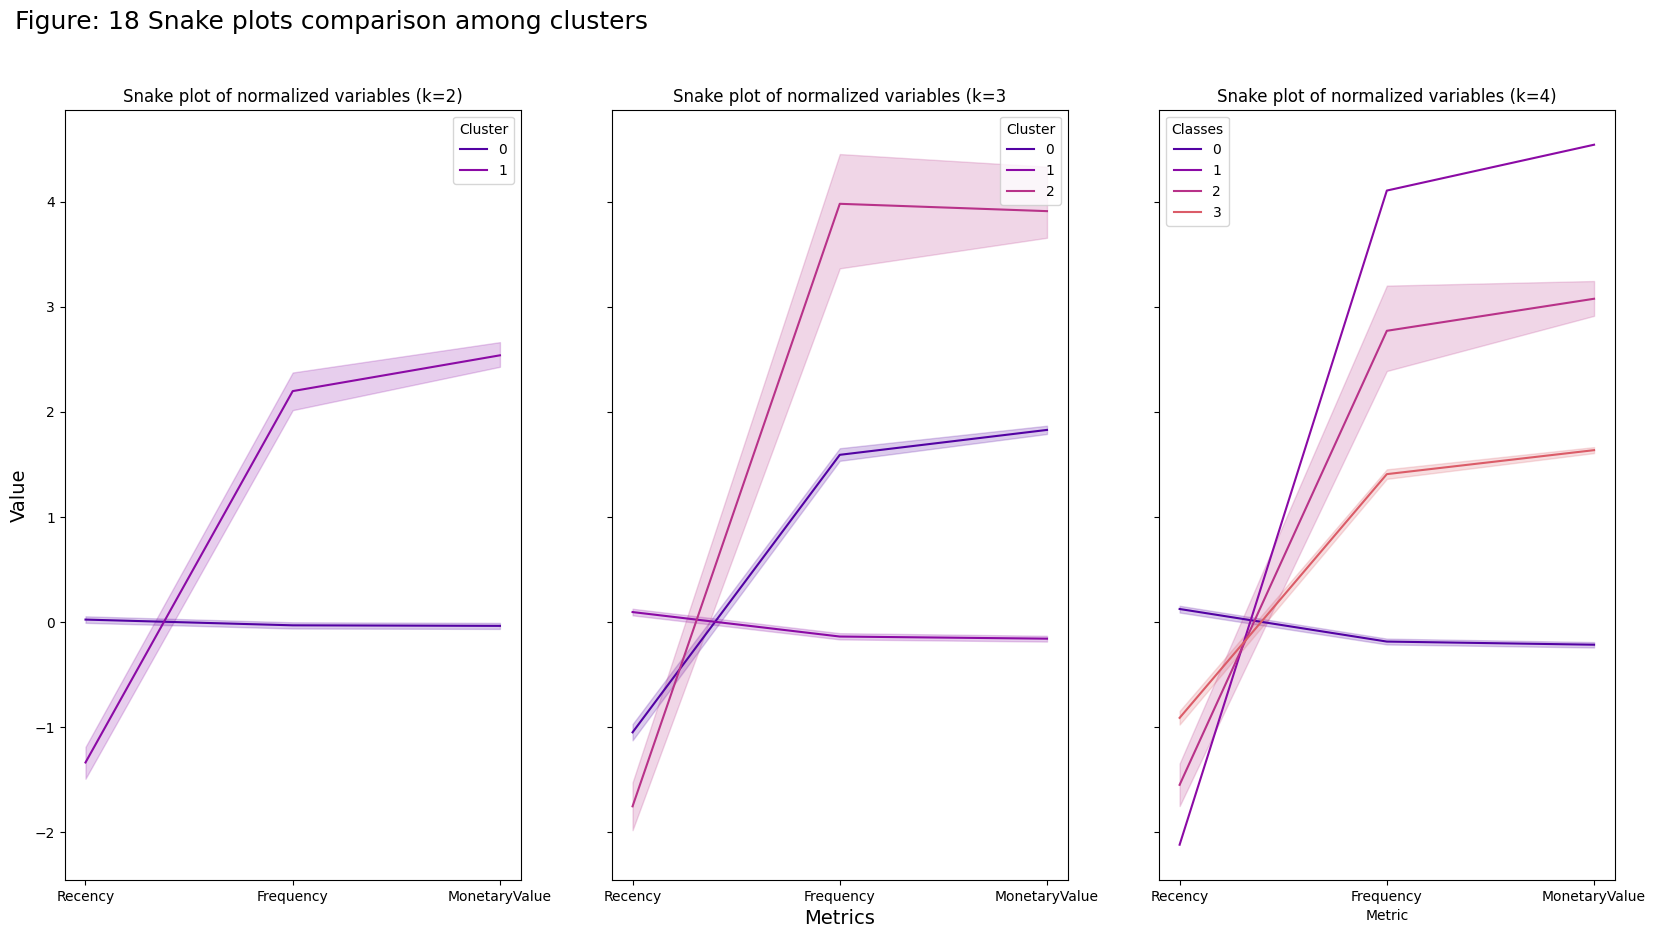

In [584]:
fig, axs = plt.subplots(1, 3, figsize=(20,10), sharey=True)
plt.suptitle('Figure: 18 Snake plots comparison among clusters', fontsize=18, ha='left', x=0.1)

# Plot a line for each value of the cluster variable
sns.lineplot(data=df_melt_k2, x='Metric', y='Value', hue='Cluster', ax=axs[0], palette=palette)
sns.lineplot(data=df_melt_k3, x='Metric', y='Value', hue='Cluster', ax=axs[1], palette=palette)
sns.lineplot(data=df_melt_k4, x='Metric', y='Value', hue='Cluster', ax=axs[2], palette=palette)

axs[0].set_title('Snake plot of normalized variables (k=2)')
axs[1].set_title('Snake plot of normalized variables (k=3')
axs[2].set_title('Snake plot of normalized variables (k=4)')
axs[0].set_xlabel('')
axs[1].set_xlabel('Metrics', fontsize=14)
axs[0].set_ylabel('Value', fontsize=14)
plt.legend(title='Classes', loc='upper left')

plt.show()

The three snake plots above depict the distribution of Recency, Frequency, and Monetary Values metrics across clusters. The distinct separation between clusters indicates a diverse and well-balanced mix, enabling targeted strategies for different customer segments.

In [585]:
# Enable warnings SettingWithCopyWarning
pd.options.mode.chained_assignment = "warn"

In [586]:
# Calculate average RFM values for each cluster
cluster_avg = clustered_k2.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = df_to_cluster.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp_k2 = cluster_avg / population_avg - 1

In [587]:
# Calculate average RFM values for each cluster
cluster_avg = clustered_k3.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = df_to_cluster.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp_k3 = cluster_avg / population_avg - 1

In [588]:
# Calculate average RFM values for each cluster
cluster_avg = clustered_k4.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = df_to_cluster.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp_k4 = cluster_avg / population_avg - 1

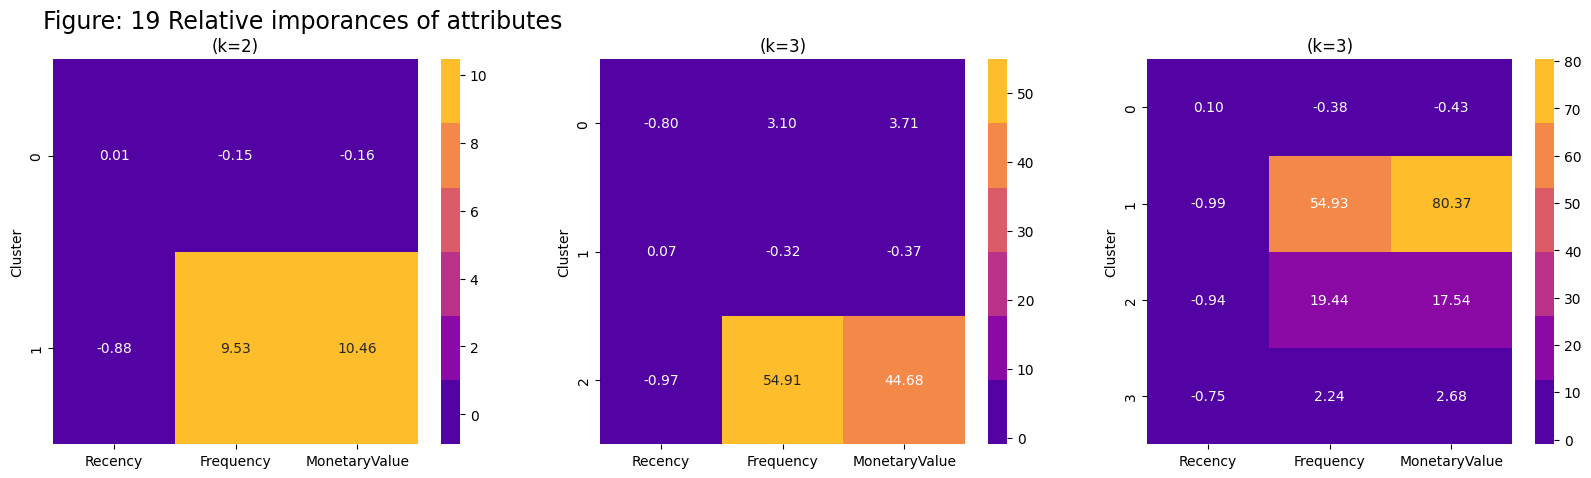

In [589]:
k=fig, axs = plt.subplots(1, 3, figsize=(20,5))
plt.suptitle('Figure: 19 Relative imporances of attributes', fontsize=17, ha='left', x=0.12)

sns.heatmap(data=relative_imp_k2, annot=True, fmt='.2f', ax=axs[0], cmap=palette)
sns.heatmap(data=relative_imp_k3, annot=True, fmt='.2f', ax=axs[1], cmap=palette)
sns.heatmap(data=relative_imp_k4, annot=True, fmt='.2f', ax=axs[2], cmap=palette)

axs[0].set_title('(k=2)')
axs[1].set_title('(k=3)')
axs[2].set_title('(k=3)')
plt.show()

The three heatmaps above demonstrate that Frequency and Monetary Values metrics have a strong influence on segmentation. These metrics play a crucial role in distinguishing customer segments effectively.

Below is a visually three-dimensional graphic representation showcasing the intricate separation of data points within the clusters.

In [590]:
pio.templates.default = "plotly_dark"

# Creation of the figure with two subplots
fig = make_subplots(rows=1, 
                    cols=3,
                    subplot_titles=['K=2', 'K=3', 'K=4'],
                    specs=[[{'type': 'scatter3d'},{'type': 'scatter3d'},{'type': 'scatter3d'}]])

# Creation of the k2 subplot
fig.add_trace(px.scatter_3d(df_to_cluster, 
                            x="Recency", 
                            y="Frequency", 
                            z="MonetaryValue", 
                            color=clustered_k2["Cluster"], 
                            size_max=5, 
                            opacity=0.8).data[0], row=1, col=1)

fig.update_traces(hovertemplate='Cluster: %{marker.color}<br>Recency: %{x}<br>Frequency: %{y}<br>MonetaryValue: %{z}')

# Creation of the k3 subplot
fig.add_trace(px.scatter_3d(df_to_cluster, 
                            x="Recency", 
                            y="Frequency", 
                            z="MonetaryValue", 
                            color=clustered_k3["Cluster"], 
                            size_max=5, 
                            opacity=0.8).data[0], row=1, col=2)

fig.update_traces(hovertemplate='Cluster: %{marker.color}<br>Recency: %{x}<br>Frequency: %{y}<br>MonetaryValue: %{z}')

# Creation of the k4 subplot
fig.add_trace(px.scatter_3d(df_to_cluster, 
                            x="Recency", 
                            y="Frequency", 
                            z="MonetaryValue", 
                            color=clustered_k4["Cluster"], 
                            size_max=5, 
                            opacity=0.8).data[0], row=1, col=3)

fig.update_traces(hovertemplate='Cluster: %{marker.color}<br>Recency: %{x}<br>Frequency: %{y}<br>MonetaryValue: %{z}')

fig.update_layout(width=1700, 
                  height=800, 
                  title={'text': 'Figure: 20 Clustered data (K=2 vs K=3 vs K=4)',
                         'x':0.05,
                         'y':0.95,
                         'xanchor': 'left',
                         'yanchor': 'top'
                         },
                  scene=dict(xaxis_title='Recency',
                             yaxis_title='Frequency', 
                             zaxis_title='MonetaryValue'),
                  scene2=dict(xaxis_title='Recency',
                              yaxis_title='Frequency',
                              zaxis_title='MonetaryValue'),
                  scene3=dict(xaxis_title='Recency',
                              yaxis_title='Frequency',
                              zaxis_title='MonetaryValue'))

fig.show()


<a name="conclusion"></a>
##8. Conclusion

In conclusion, the analysis of the results provides valuable insights into various aspects of the company's performance, customer behavior, and market trends. The findings highlight the following key points:

-   Market Share: The United Kingdom leads the market with a significant share of 85.6%, followed by Germany, France, EIRE, and Spain. The dominance of the UK suggests that it is a crucial target market for the company.
-   Sales Performance: The top 5 countries in terms of product sales are the United Kingdom, Germany, France, EIRE, and Spain. The United Kingdom stands out with approximately 2 million units sold, indicating its importance as a major revenue generator for the company.
-   Revenue Generation: The revenue figures align with the sales performance, with the United Kingdom generating the highest revenue of 3,431,183.30 units, followed by Germany, France, EIRE, and Spain. These numbers emphasize the significance of focusing on the top-performing countries to drive revenue growth.
-   Best-Selling Products: The top 10 best-selling products include items like retrospot cake cases, assorted color bird ornaments, and jumbo bags. Understanding the popularity of these products can help the company optimize its inventory and marketing strategies to meet customer demand effectively.
-   Seasonality and Trends: The analysis reveals a positive trend in orders until November, with the highest number of orders recorded during that month. However, after November, there is a rapid decline. The revenue trend follows a similar pattern. These findings indicate the need for targeted marketing campaigns and strategies to sustain customer engagement beyond the peak season.
-   Customer Behavior: The analysis of customer orders by day of the week and time of day shows that Thursdays are the busiest, while Fridays record fewer orders. The majority of orders are placed between 12:00 and 2:00 p.m., suggesting that customers tend to make purchases during their lunch breaks. This information can be leveraged to optimize marketing campaigns and customer service availability.
-   Customer Segmentation: The RFM analysis and K-Means Clustering provide insights into customer segmentation. Through the RFM analysis, we segmented customers into five classes. The 5-star segment represents the most valuable customers, while the 1-star segment represents the least valuable. The implementation of the K-Means Clustering model has proven to be effective in providing valuable insights into customer behavior through the creation of four distinct clusters. The snake plots visually illustrate a clear separation between these clusters, indicating a diverse and well-balanced mix of customer segments. Furthermore, the heatmaps depicting the relative importance of attributes highlight the significant influence of metrics such as Frequency and Monetary Values on the segmentation process. These findings suggest that the K-Means Clustering model successfully captures important patterns and characteristics within the customer data, enabling businesses to gain a deeper understanding and make informed decisions based on customer behavior.

Based on the analysis, here are the most important suggestions to improve analysis and marketing strategies:

- Expand Market Share: Focus on expanding market share in the United Kingdom, the leading country with 85.6% market share. Develop targeted marketing campaigns and initiatives to increase customer acquisition and strengthen brand presence.
- Diversify Product Offering: Continuously introduce new products to cater to changing customer preferences and expand the customer base. Conduct market research to identify untapped opportunities and align product development with customer needs.
- Sustain Customer Engagement: Implement strategies to maintain customer engagement beyond the peak season. Use loyalty programs, personalized marketing campaigns, and proactive customer service to drive repeat purchases and increase customer lifetime value.
- Optimize Timing and Channels: Analyze customer behavior data to optimize marketing efforts during the most active periods, such as lunch breaks. Utilize targeted marketing channels like social media, email marketing, and mobile notifications.
- Enhance Customer Experience: Deliver exceptional customer experiences at every touchpoint. Streamline the purchasing process, offer convenient payment options, and invest in personalized customer support.
- Refine Customer Segmentation: Continuously refine customer segmentation based on RFM analysis and develop targeted marketing campaigns tailored to each segment's preferences, interests, and behavior.

By focusing on these key areas, the company can improve its market position, drive revenue growth, and enhance customer satisfaction and loyalty.